## I/ DaTscan Images

### Imports

In [9]:
import os
import shutil
import subprocess

import pydicom
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

from skimage.restoration import denoise_nl_means, estimate_sigma
from bm3d import bm3d, BM3DProfile

# from collections import Counter

### display the original images (DICOM)

In [4]:
def display_dicom_image(dicom_file, axis="x"):
    try:
        ds = pydicom.dcmread(dicom_file)
        img = ds.pixel_array

        # Take middle slice in x-axis
        if axis == "x":
            x_middle = img.shape[0] // 2
            img_slice = img[x_middle, :, :]
        # Take middle slice in y-axis
        elif axis == "y":
            y_middle = img.shape[1] // 2
            img_slice = img[:, y_middle, :]

        # Take middle slice in z-axis
        else:
            z_middle = img.shape[2] // 2
            img_slice = img[:, :, z_middle]


        plt.imshow(img_slice, cmap='gray')
        plt.title(f"DICOM: {os.path.basename(dicom_file)}")
        plt.axis('off')
        plt.show()
    except Exception as e:
        print(f"Failed to read {dicom_file}: {e}")

In [5]:
base_path = "Dataset/datscan_images/PPMI"

displayed_count = 0
MAX_DISPLAYED = 10

for patient_id in os.listdir(base_path):
    patient_path = os.path.join(base_path, patient_id)
    if not os.path.isdir(patient_path):
        continue

    for scan_type in os.listdir(patient_path):
        scan_type_path = os.path.join(patient_path, scan_type)
        if not os.path.isdir(scan_type_path):
            continue

        for scan_date in os.listdir(scan_type_path):
            scan_date_path = os.path.join(scan_type_path, scan_date)
            if not os.path.isdir(scan_date_path):
                continue

            for image_id in os.listdir(scan_date_path):
                image_folder_path = os.path.join(scan_date_path, image_id)
                if not os.path.isdir(image_folder_path):
                    continue

                for file in os.listdir(image_folder_path):
                    if file.lower().endswith(".dcm"):
                        dicom_file = os.path.join(image_folder_path, file)
                        display_dicom_image(dicom_file)
                        displayed_count += 1
                        break

                if displayed_count >= MAX_DISPLAYED:
                    break
            if displayed_count >= MAX_DISPLAYED:
                break
        if displayed_count >= MAX_DISPLAYED:
            break
    if displayed_count >= MAX_DISPLAYED:
        break

Failed to read Dataset/datscan_images/PPMI\100001\Reconstructed_DaTSCAN\2020-09-09_17_07_33.0\I1452480\PPMI_100001_NM_Reconstructed_DaTSCAN_Br_20210608102518754_1_S1028880_I1452480.dcm: name 'pydicom' is not defined
Failed to read Dataset/datscan_images/PPMI\100001\Reconstructed_DaTSCAN\2021-04-06_15_28_03.0\I1518598\PPMI_100001_NM_Reconstructed_DaTSCAN_Br_20211123160501613_1_S1084118_I1518598.dcm: name 'pydicom' is not defined
Failed to read Dataset/datscan_images/PPMI\100001\Reconstructed_DaTSCAN\2021-12-02_14_51_37.0\I1530341\PPMI_100001_NM_Reconstructed_DaTSCAN_Br_20220106110130944_1_S1093386_I1530341.dcm: name 'pydicom' is not defined
Failed to read Dataset/datscan_images/PPMI\100001\Reconstructed_DaTSCAN\2022-04-26_11_15_33.0\I1582833\PPMI_100001_NM_Reconstructed_DaTSCAN_Br_20220520125048140_1_S1135141_I1582833.dcm: name 'pydicom' is not defined
Failed to read Dataset/datscan_images/PPMI\100001\Reconstructed_DaTSCAN\2022-11-30_13_08_05.0\I1660691\PPMI_100001_NM_Reconstructed_DaTS

### 1. Conversion from DICOM to NIfTI

In [6]:
def display_nifti_img(data, ax=None, title="", axis="z"):
    # Take middle slice in x-axis
    if axis == "x":
        x_middle = data.shape[0] // 2
        slice_img = data[x_middle, :, :]

    # Take middle slice in y-axis
    elif axis == "y":
        y_middle = data.shape[1] // 2
        slice_img = data[:, y_middle, :]

    # Take middle slice in z-axis
    else:
        z_middle = data.shape[2] // 2
        slice_img = data[:, :, z_middle]

    if ax is None:
        # Display standalone
        plt.imshow(np.rot90(slice_img), cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        # Display in provided axis
        ax.imshow(np.rot90(slice_img), cmap='gray')
        ax.set_title(title)
        ax.axis('off')


[1/3836] Converting: patient 100001 - image I1452480....


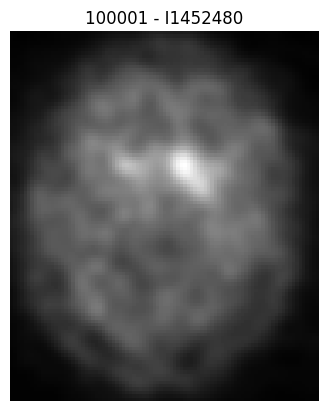


[2/3836] Converting: patient 100001 - image I1518598....


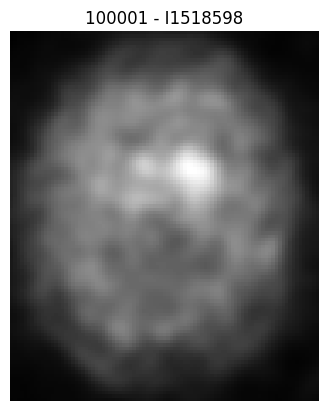


[3/3836] Converting: patient 100001 - image I1530341....


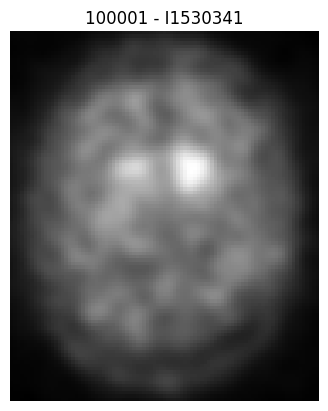


[4/3836] Converting: patient 100001 - image I1582833....


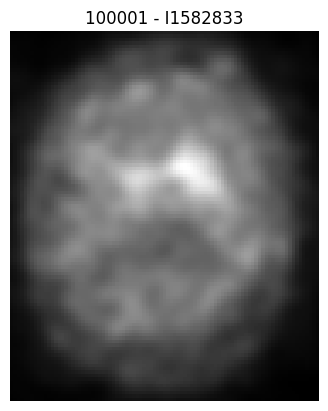


[5/3836] Converting: patient 100001 - image I1660691....


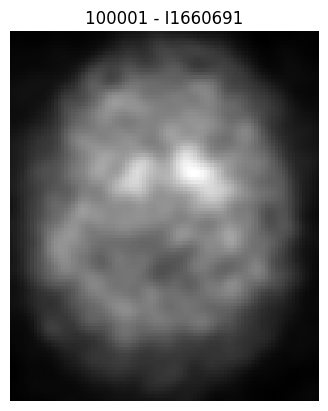


[6/3836] Converting: patient 100001 - image I10960001....


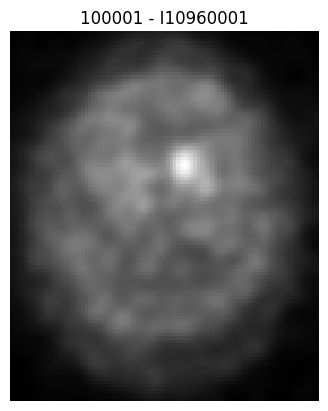


[7/3836] Converting: patient 100002 - image I1474774....


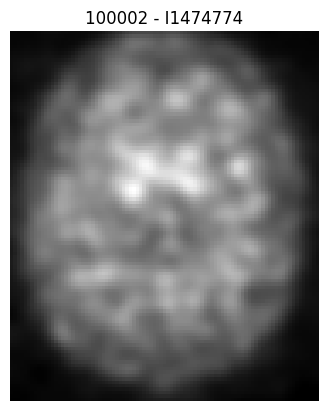


[8/3836] Converting: patient 100002 - image I1537899....


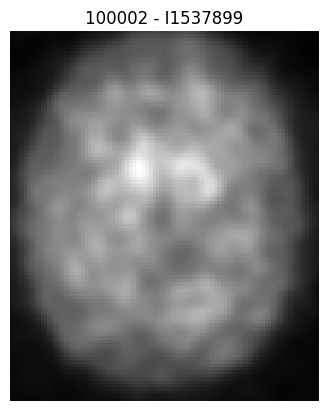


[9/3836] Converting: patient 100004 - image I1461542....


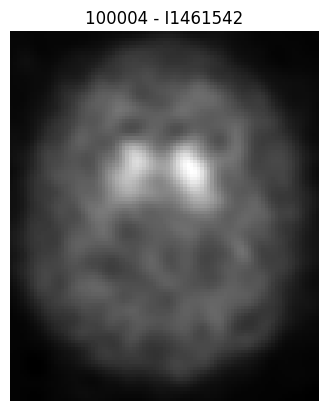


[10/3836] Converting: patient 100005 - image I1461543....


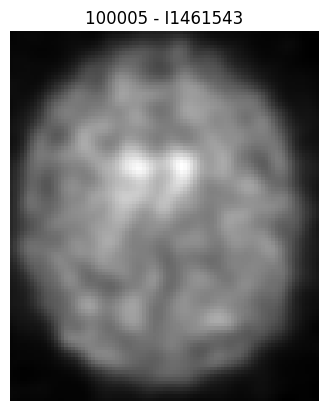


[11/3836] Converting: patient 100005 - image I1548448....

[12/3836] Converting: patient 100006 - image I1461544....

[13/3836] Converting: patient 100006 - image I1537900....

[14/3836] Converting: patient 100006 - image I10380466....

[15/3836] Converting: patient 100007 - image I1461545....

[16/3836] Converting: patient 100007 - image I1548449....

[17/3836] Converting: patient 100007 - image I10380467....

[18/3836] Converting: patient 100012 - image I1461546....

[19/3836] Converting: patient 100012 - image I1573146....

[20/3836] Converting: patient 100012 - image I1671552....

[21/3836] Converting: patient 100017 - image I1474775....

[22/3836] Converting: patient 100017 - image I1619847....

[23/3836] Converting: patient 100017 - image I1671556....

[24/3836] Converting: patient 100018 - image I1461547....

[25/3836] Converting: patient 100018 - image I1603132....

[26/3836] Converting: patient 100018 - image I10380468....

[27/3836] Converting: patient 100267 - image I146154

KeyboardInterrupt: 

In [ ]:
total_images = 3839 - 3 # images that failed to denoise
processed_count = 0
displayed_count = 0
failed_images = []

nifti_path = "Dataset/datscan_images/Converted_NIfTI"
os.makedirs(nifti_path, exist_ok=True)

def convert_with_dcm2niix(dicom_folder, output_file):
    try:
        output_dir = os.path.dirname(output_file)
        os.makedirs(output_dir, exist_ok=True)

        subprocess.run([
            "NeuroImaging_Tools/dcm2niix/dcm2niix.exe",
            "-z", "y",                # gzip compress
            "-f", "temp_convert",     # temporary filename
            "-o", output_dir,         # output directory
            dicom_folder
        ], check=True)

        # rename files by image id
        nii_file = None
        json_file = None

        for f in os.listdir(output_dir):
            if f.startswith("temp_convert") and f.endswith(".nii.gz"):
                nii_file = f
            elif f.startswith("temp_convert") and f.endswith(".json"):
                json_file = f

        if nii_file:
            os.rename(os.path.join(output_dir, nii_file), output_file)

            if json_file:
                json_output = os.path.splitext(os.path.splitext(output_file)[0])[0] + ".json"
                os.rename(
                    os.path.join(output_dir, json_file),
                    json_output
                )
            return True

        print(f"[✘] No NIfTI file generated for {dicom_folder}")
        return False


    except subprocess.CalledProcessError as e:
        print(f"[✘] dcm2niix failed for {dicom_folder}: {e}")
        return False


for patient_id in os.listdir(base_path):
    patient_path = os.path.join(base_path, patient_id)
    if not os.path.isdir(patient_path):
        continue

    for scan_type in os.listdir(patient_path):
        scan_type_path = os.path.join(patient_path, scan_type)
        if not os.path.isdir(scan_type_path):
            continue

        for scan_date in os.listdir(scan_type_path):
            date_path = os.path.join(scan_type_path, scan_date)
            if not os.path.isdir(date_path):
                continue

            for image_id in os.listdir(date_path):
                image_folder = os.path.join(date_path, image_id)
                if not os.path.isdir(image_folder):
                    continue

                processed_count += 1
                print(f"\n[{processed_count}/{total_images}] Converting: patient {patient_id} - image {image_id}....")

                patient_output_dir = os.path.join(nifti_path, patient_id)
                os.makedirs(patient_output_dir, exist_ok=True)
                output_file = os.path.join(patient_output_dir, f"{image_id}.nii.gz")

                try:
                    if not convert_with_dcm2niix(image_folder, output_file):
                        failed_images.append(f"{patient_id}/{image_id}")
                        continue

                    # Display NIfTI images
                    if displayed_count < MAX_DISPLAYED and os.path.exists(output_file):
                        try:
                            img = nib.load(output_file)
                            data = img.get_fdata()
                            display_nifti_img(data, title=f"{patient_id} - {image_id}")
                            displayed_count += 1
                        except Exception as e:
                            print(f"[✘] Failed to display {output_file}: {e}")
                            failed_images.append(f"{patient_id}/{image_id}")

                except Exception as e:
                    print(f"[✘] Unexpected error processing {patient_id}/{image_id}: {e}")
                    failed_images.append(f"{patient_id}/{image_id}")


# ==== FINAL SUMMARY ====
print("\n" + "="*50)
if not failed_images:
    print("✅ All images converted successfully.")
else:
    print(f"⚠ {len(failed_images)} images failed to convert:")
    for img in failed_images:
        print(f" - {img}")

### 2. Background Thresholding


[1/3834] Thresholding: patient 100001 - image I10960001....
→ Used threshold value: 1.7646322250366206
→ Amount of 0s in original: 98243
→ Amount of 0s in thresholded: 270789


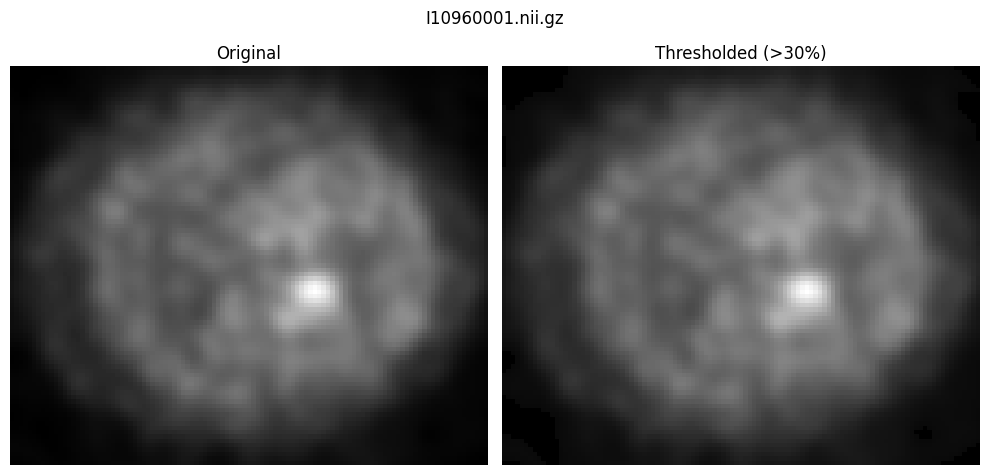


[2/3834] Thresholding: patient 100001 - image I1452480....
→ Used threshold value: -24769.600000000035
→ Amount of 0s in original: 9
→ Amount of 0s in thresholded: 270798


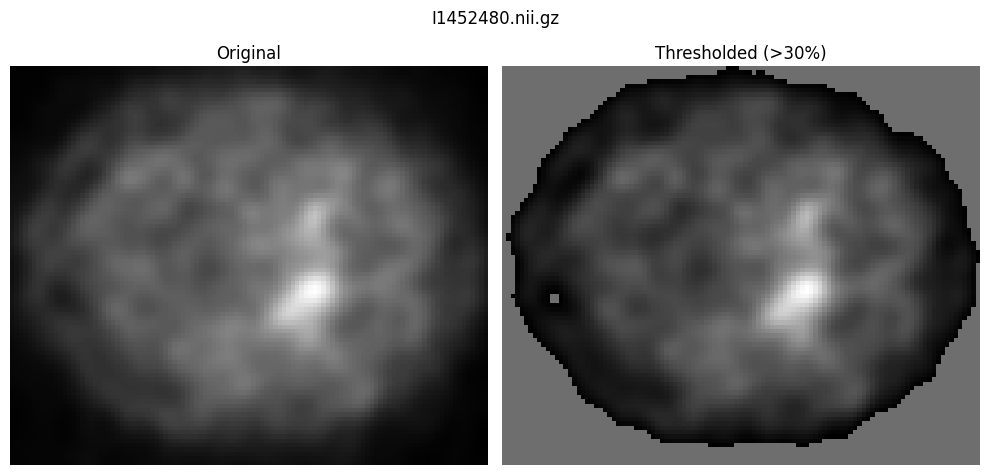


[3/3834] Thresholding: patient 100001 - image I1518598....
→ Used threshold value: 1645.0
→ Amount of 0s in original: 8940
→ Amount of 0s in thresholded: 270734


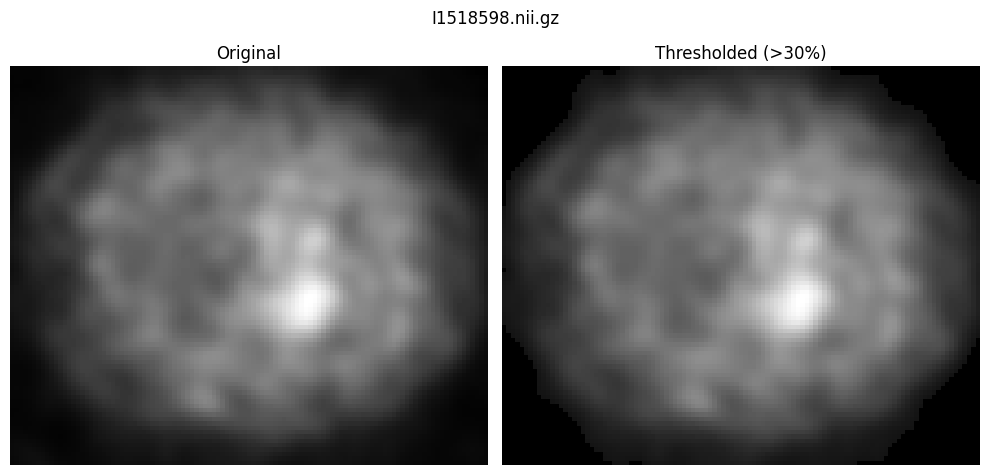


[4/3834] Thresholding: patient 100001 - image I1530341....
→ Used threshold value: 1593.0
→ Amount of 0s in original: 10013
→ Amount of 0s in thresholded: 270768


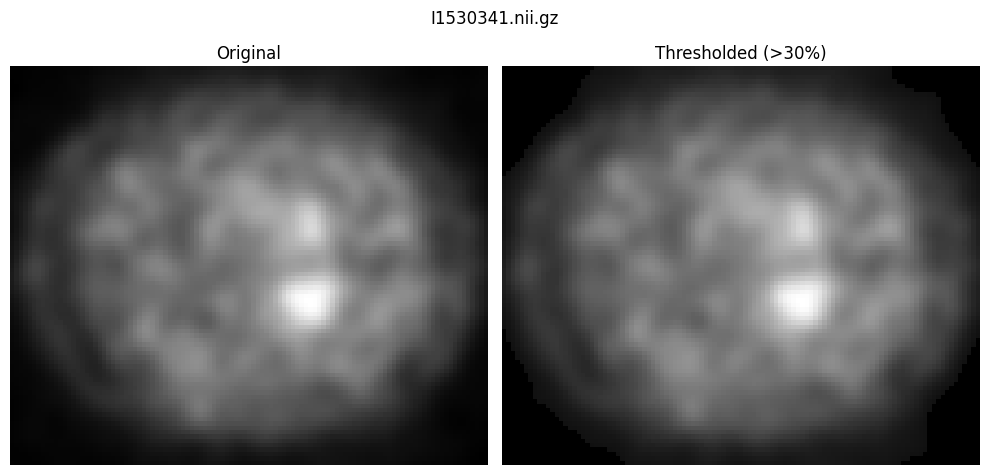


[5/3834] Thresholding: patient 100001 - image I1582833....
→ Used threshold value: 2100.0
→ Amount of 0s in original: 8940
→ Amount of 0s in thresholded: 270719


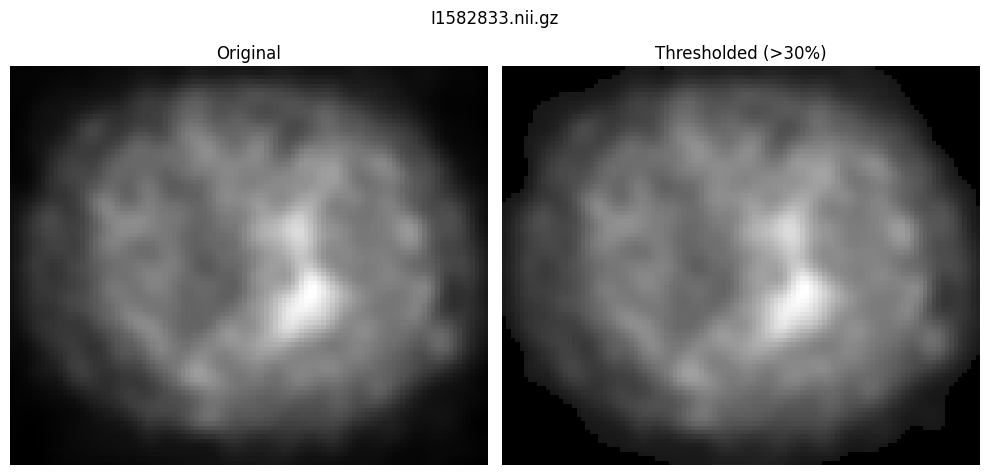


[6/3834] Thresholding: patient 100001 - image I1660691....

[7/3834] Thresholding: patient 100002 - image I1474774....

[8/3834] Thresholding: patient 100002 - image I1537899....

[9/3834] Thresholding: patient 100004 - image I1461542....

[10/3834] Thresholding: patient 100005 - image I1461543....

[11/3834] Thresholding: patient 100005 - image I1548448....

[12/3834] Thresholding: patient 100006 - image I10380466....

[13/3834] Thresholding: patient 100006 - image I1461544....

[14/3834] Thresholding: patient 100006 - image I1537900....

[15/3834] Thresholding: patient 100007 - image I10380467....

[16/3834] Thresholding: patient 100007 - image I1461545....

[17/3834] Thresholding: patient 100007 - image I1548449....

[18/3834] Thresholding: patient 100012 - image I1461546....

[19/3834] Thresholding: patient 100012 - image I1573146....

[20/3834] Thresholding: patient 100012 - image I1671552....

[21/3834] Thresholding: patient 100017 - image I1474775....

[22/3834] Thresholding: p

In [ ]:
total_images = sum(
    1 for root, dirs, files in os.walk(nifti_path)
    for file in files if file.endswith(".nii") or file.endswith(".nii.gz")
)
processed_count = 0
displayed_count = 0
failed_images = []


percentile = 30 # 27
thresholded_path = "Dataset/datscan_images/Thresholded_NIfTI(30th)"
os.makedirs(thresholded_path, exist_ok=True)

def apply_dynamic_threshold(input_file, output_file, percentile=30):
    global displayed_count, MAX_DISPLAYED
    try:
        # Load image
        img = nib.load(input_file)
        data = img.get_fdata()

        # Calculate dynamic threshold (ignoring zero voxels)
        threshold = np.percentile(data, percentile)

        # Apply threshold
        thresholded_data = np.where(data >= threshold, data, 0)

        # Save thresholded image
        nib.save(
            nib.Nifti1Image(thresholded_data, affine=img.affine, header=img.header),
            output_file
        )

        if displayed_count < MAX_DISPLAYED:
            # Print info
            print("→ Used threshold value:", threshold)
            print("→ Amount of 0s in original:", np.sum(data == 0))
            print("→ Amount of 0s in thresholded:", np.sum(thresholded_data == 0))

            # Display BEFORE/AFTER
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            fig.suptitle(os.path.basename(input_file))

            display_nifti_img(data, ax=axs[0], title="Original")
            display_nifti_img(thresholded_data, ax=axs[1], title=f"Thresholded (>{percentile}%)")

            plt.tight_layout()
            plt.show()

            displayed_count += 1

        return True

    except Exception as e:
        print(f"[✘] Failed on {input_file}: {e}")
        return False
    
    
for root, dirs, files in os.walk(nifti_path):
    for file in files:
        if file.endswith(".nii") or file.endswith(".nii.gz"):
            processed_count += 1
            
            patient_id = os.path.basename(root)
            img_id = os.path.splitext(os.path.splitext(file)[0])[0]  # remove .nii.gz
            print(f"\n[{processed_count}/{total_images}] Thresholding: patient {patient_id} - image {img_id}....")

            input_path = os.path.join(root, file)

            patient_output_dir = os.path.join(thresholded_path, patient_id)
            os.makedirs(patient_output_dir, exist_ok=True)
            output_file = os.path.join(patient_output_dir, f"{img_id}.nii.gz")

            if not apply_dynamic_threshold(input_path, output_file, percentile):
                failed_images.append(f"{patient_id}/{img_id}")

        
print("\n" + "="*50)
if not failed_images:
    print("✅ All images thresholded successfully.")
else:
    print(f"⚠ {len(failed_images)} images failed to threshold:")
    for img in failed_images:
        print(f" - {img}")

### 3.1 Denoising using NLM (Non-Local Means)

⚠ 3 images failed to denoise:
 - 3372/I1317554
 - 4092/I449046
 - 50028/I1273880
 


[1/3834] Denoising: patient 100001 - image I10960001....


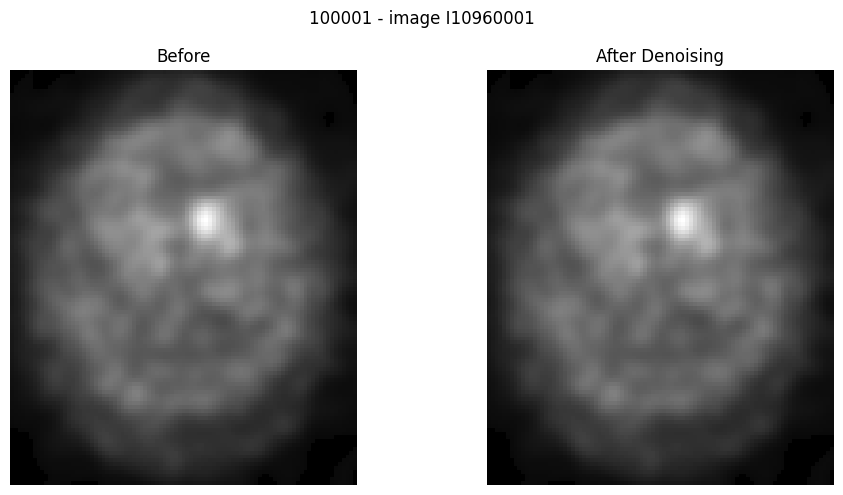


[2/3834] Denoising: patient 100001 - image I1452480....


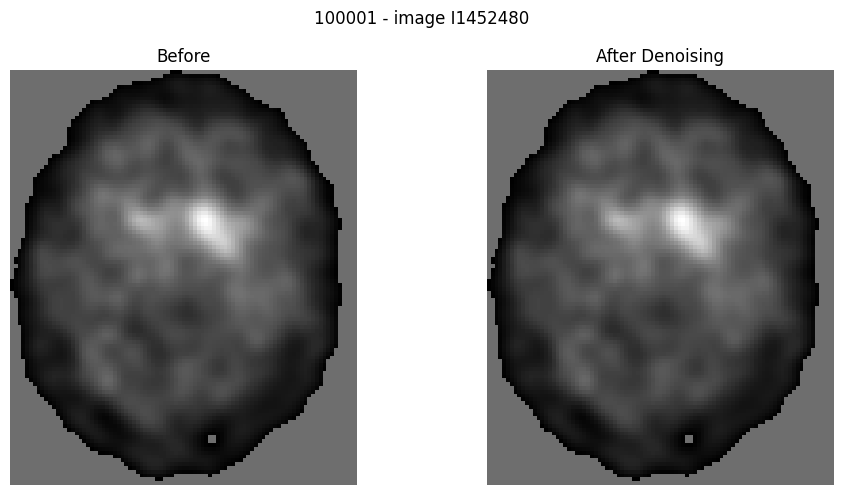


[3/3834] Denoising: patient 100001 - image I1518598....


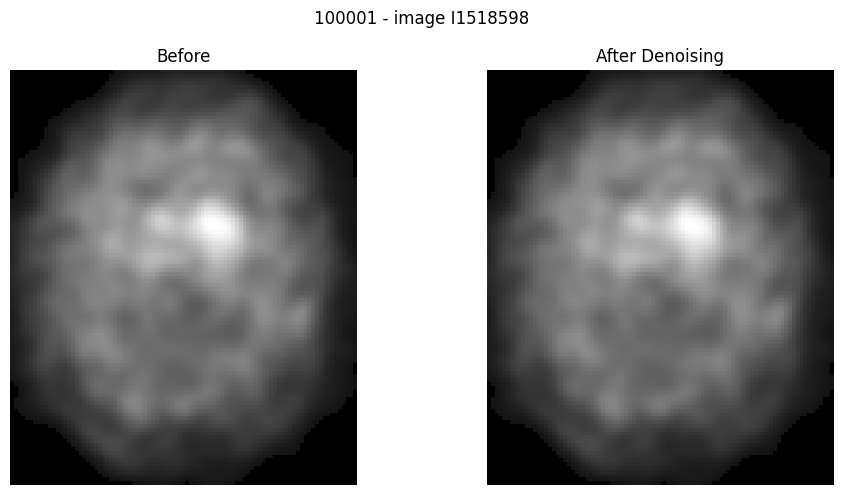


[4/3834] Denoising: patient 100001 - image I1530341....


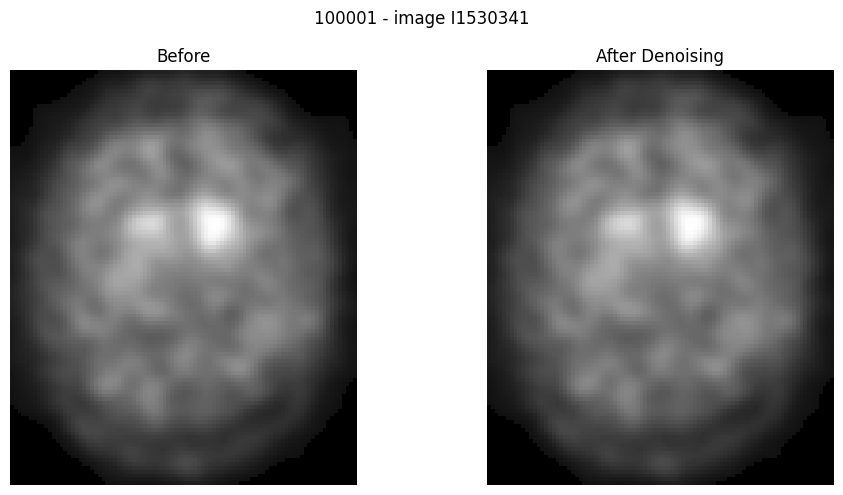


[5/3834] Denoising: patient 100001 - image I1582833....


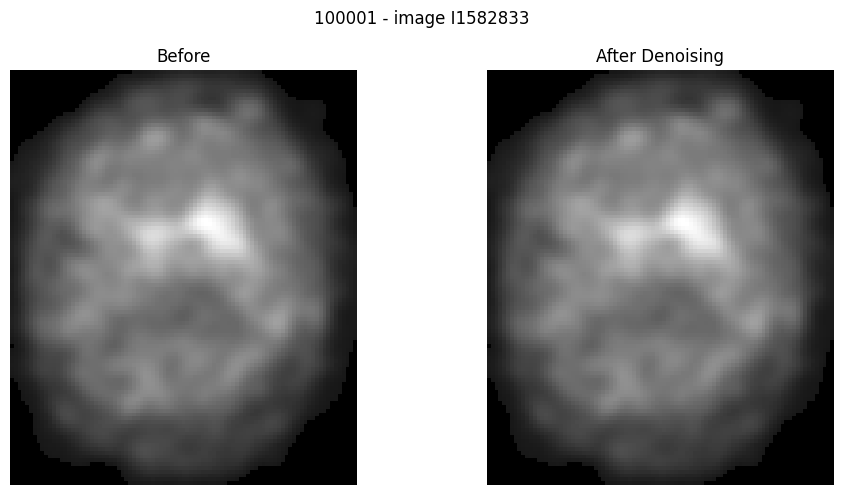


[6/3834] Denoising: patient 100001 - image I1660691....

[7/3834] Denoising: patient 100002 - image I1474774....


KeyboardInterrupt: 

In [ ]:
total_images = sum(
    1 for root, dirs, files in os.walk(thresholded_path)
    for file in files if file.endswith(".nii") or file.endswith(".nii.gz")
)
processed_count = 0
displayed_count = 0
failed_denoising = []


denoised_path = "Dataset\datscan_images\Denoised_NIfTI_paired(986)"
os.makedirs(denoised_path, exist_ok=True)

for root, dirs, files in os.walk(thresholded_path):
    for file in files:
        if file.endswith(".nii") or file.endswith(".nii.gz"):
            processed_count += 1

            patient_id = os.path.basename(root)
            img_id = os.path.splitext(os.path.splitext(file)[0])[0]

            input_path = os.path.join(root, file)

            patient_output_dir = os.path.join(denoised_path, patient_id)
            os.makedirs(patient_output_dir, exist_ok=True)
            output_file = os.path.join(patient_output_dir, f"{img_id}.nii.gz")

            # === SKIP if already denoised ===
            if os.path.exists(output_file):
                print(f"[✔] Skipping (already processed): {patient_id} - {img_id}")
                continue

            print(f"\n[{processed_count}/{total_images}] Denoising: patient {patient_id} - image {img_id}....")

            try:
                # Load image
                img = nib.load(input_path)
                data = img.get_fdata()

                # Estimate the Gaussian noise standard deviation (ignore zeros)
                # sigma_est = np.mean(estimate_sigma(data[data > 0], channel_axis=None))
                sigma_est = np.mean(estimate_sigma(data, channel_axis=None))

                # Apply Non-Local Means denoising
                denoised_data = denoise_nl_means(
                    data,
                    h=0.8 * sigma_est,  # smoothing strength
                    patch_size=3,
                    patch_distance=5,
                    channel_axis=None,  # for grayscale image
                    fast_mode=True
                )

                # Display BEFORE/AFTER
                if displayed_count < MAX_DISPLAYED:
                    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
                    plt.suptitle(f"{patient_id} - image {img_id}")

                    display_nifti_img(data, ax=axes[0], title="Before")
                    display_nifti_img(denoised_data, ax=axes[1], title="After Denoising NLM")

                    plt.tight_layout()
                    plt.show()
                    
                    displayed_count += 1

                # Save denoised image
                nib.save(
                    nib.Nifti1Image(denoised_data, affine=img.affine, header=img.header),
                    output_file
                )

            except Exception as e:
                print(f"[✘] Failed denoising {patient_id}/{img_id}: {e}")
                failed_denoising.append(f"{patient_id}/{img_id}")


# ==== FINAL SUMMARY ====
print("\n" + "="*50)
if not failed_denoising:
    print("✅ All images denoised successfully.")
else:
    print(f"⚠ {len(failed_denoising)} images failed to denoise:")
    for img_name in failed_denoising:
        print(f" - {img_name}")

### 3.2 Denoising using BM3D (Block-matching and 3D filtering )

In [5]:
nifti_path = "Dataset\datscan_images\Converted_NIfTI_unpaired"

#### on full volume

[✔] Skipping (already processed): 100001 - I10960001
[✔] Skipping (already processed): 100001 - I1452480
[✔] Skipping (already processed): 100001 - I1518598
[✔] Skipping (already processed): 100001 - I1530341
[✔] Skipping (already processed): 100001 - I1582833
[✔] Skipping (already processed): 100001 - I1660691
[✔] Skipping (already processed): 100002 - I1474774
[✔] Skipping (already processed): 100002 - I1537899
[✔] Skipping (already processed): 100004 - I1461542
[✔] Skipping (already processed): 100005 - I1461543
[✔] Skipping (already processed): 100006 - I1461544
[✔] Skipping (already processed): 100007 - I1461545
[✔] Skipping (already processed): 100012 - I1461546
[✔] Skipping (already processed): 100017 - I1474775
[✔] Skipping (already processed): 100017 - I1619847
[✔] Skipping (already processed): 100018 - I1461547
[✔] Skipping (already processed): 100267 - I10380475
[✔] Skipping (already processed): 100267 - I1461548
[✔] Skipping (already processed): 100268 - I1461549
[✔] Skippi

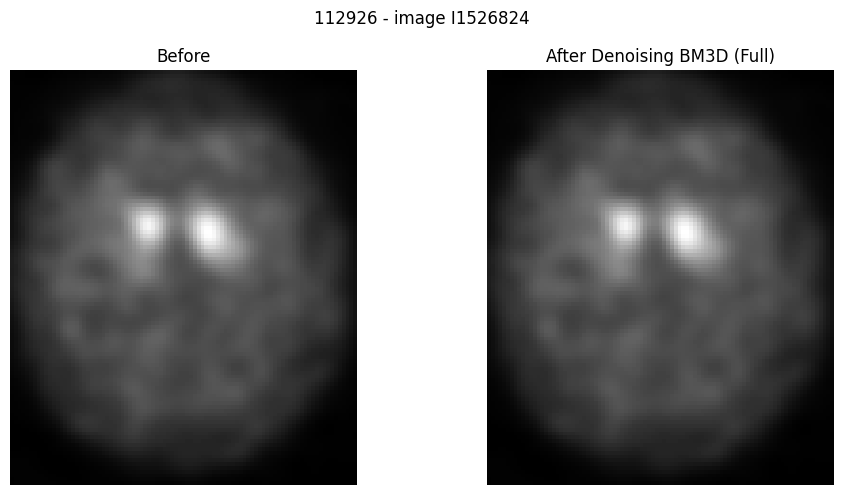


[270/2848] BM3D Denoising: patient 112926 - image I1660670....
→ Estimated sigma: 0.6152


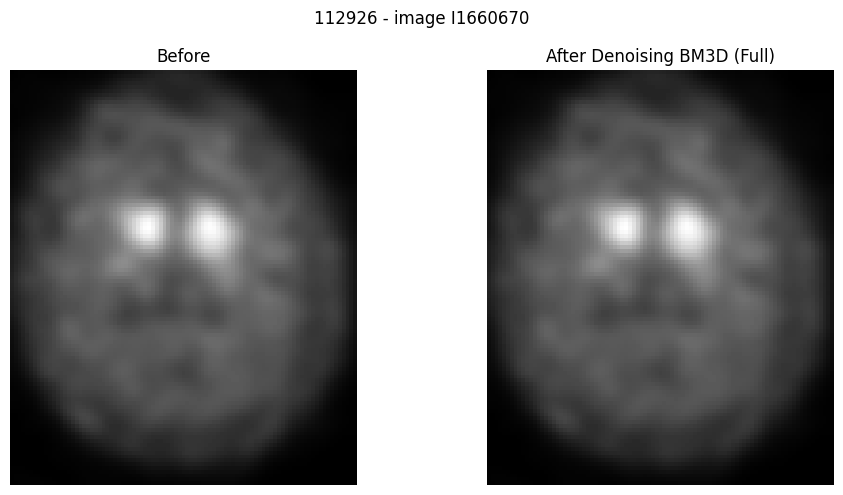


[271/2848] BM3D Denoising: patient 113043 - image I1542904....
→ Estimated sigma: 0.0045


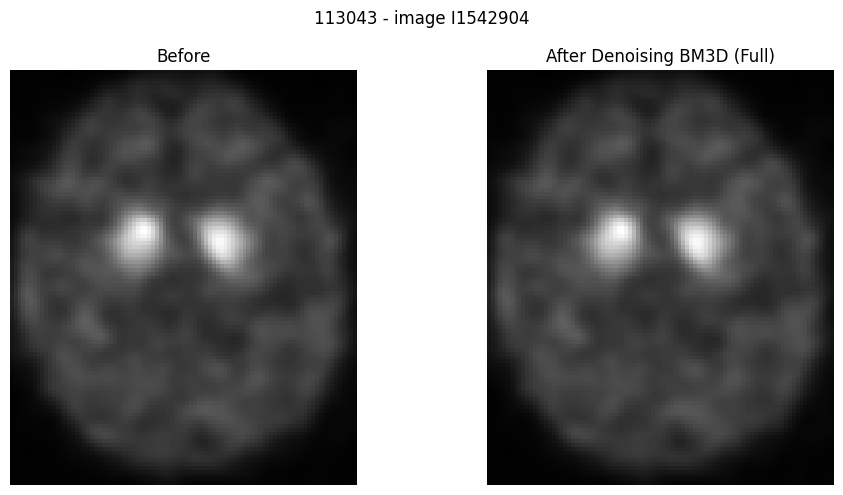


[272/2848] BM3D Denoising: patient 113050 - image I1526825....
→ Estimated sigma: 0.8126


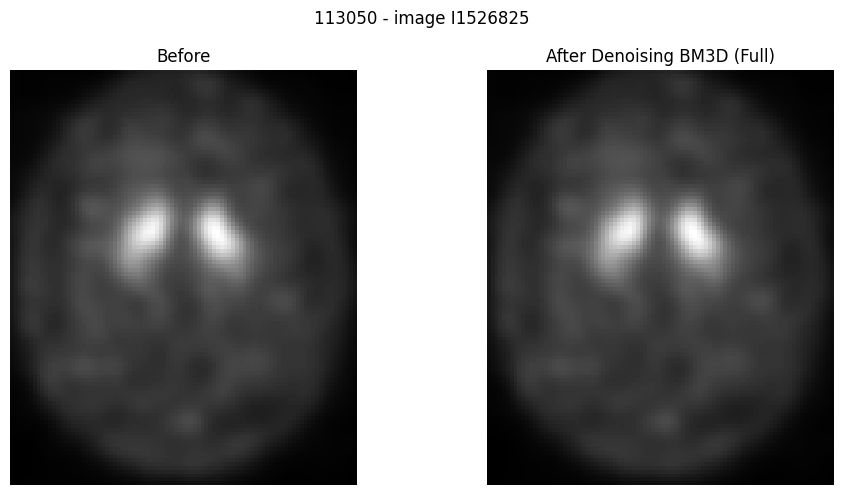


[273/2848] BM3D Denoising: patient 113355 - image I11083549....
→ Estimated sigma: 0.0013


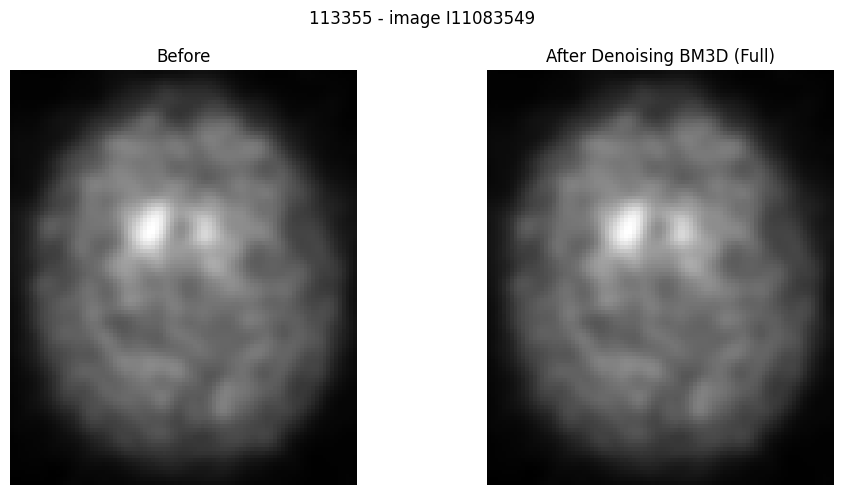


[274/2848] BM3D Denoising: patient 113355 - image I1526826....
→ Estimated sigma: 0.5873


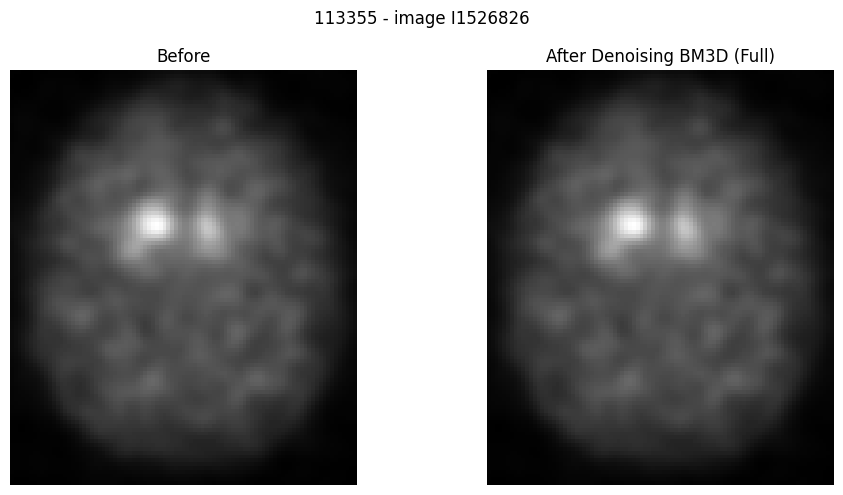


[275/2848] BM3D Denoising: patient 113355 - image I1671687....
→ Estimated sigma: 0.5612


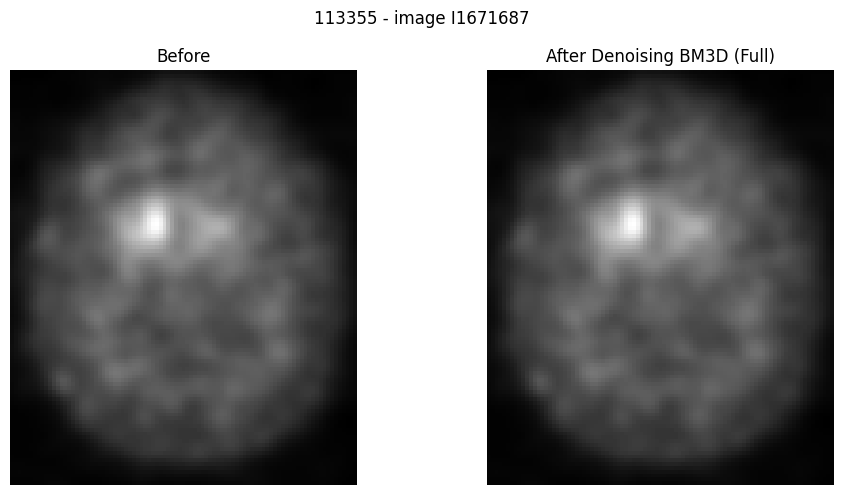


[276/2848] BM3D Denoising: patient 113366 - image I1665807....
→ Estimated sigma: 0.3373


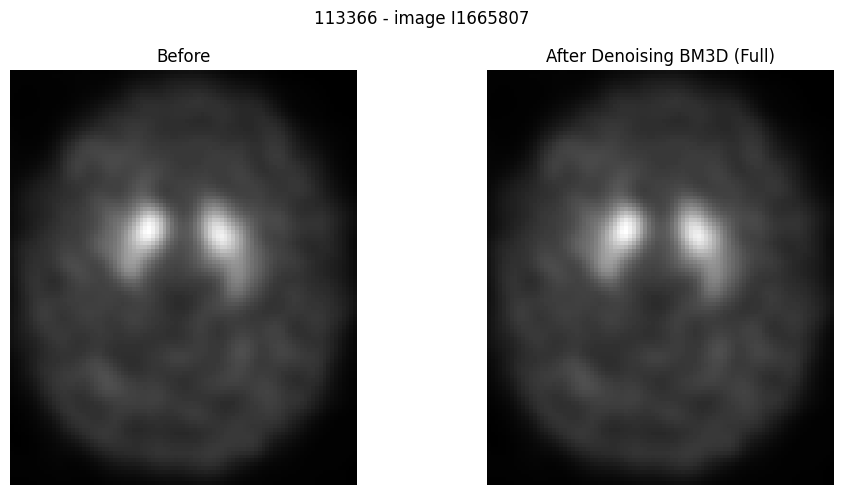


[277/2848] BM3D Denoising: patient 113369 - image I1526827....
→ Estimated sigma: 0.0016


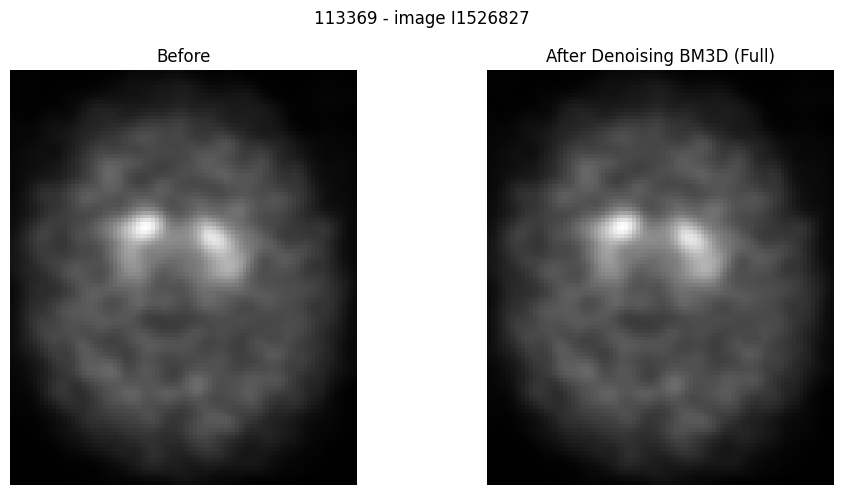


[278/2848] BM3D Denoising: patient 113446 - image I1529619....
→ Estimated sigma: 0.9509


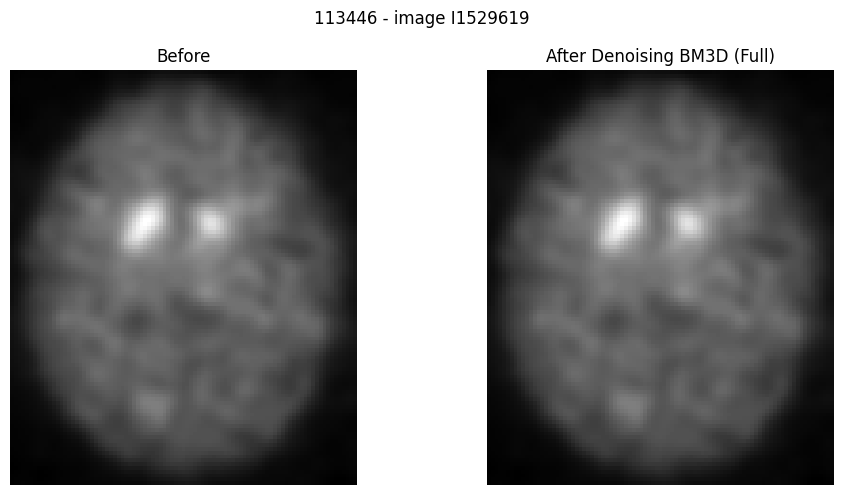


[279/2848] BM3D Denoising: patient 113447 - image I1529620....
→ Estimated sigma: 0.9398

[280/2848] BM3D Denoising: patient 113460 - image I10380607....
→ Estimated sigma: 0.0008

[281/2848] BM3D Denoising: patient 113460 - image I10676999....
→ Estimated sigma: 0.0008

[282/2848] BM3D Denoising: patient 113460 - image I1526828....
→ Estimated sigma: 0.3741

[283/2848] BM3D Denoising: patient 113672 - image I1571461....
→ Estimated sigma: 0.4420

[284/2848] BM3D Denoising: patient 113905 - image I1529621....
→ Estimated sigma: 0.3700

[285/2848] BM3D Denoising: patient 114126 - image I1526829....
→ Estimated sigma: 0.7544

[286/2848] BM3D Denoising: patient 114137 - image I11083550....
→ Estimated sigma: 0.0024

[287/2848] BM3D Denoising: patient 114137 - image I1623685....
→ Estimated sigma: 1.2803

[288/2848] BM3D Denoising: patient 114195 - image I11083551....
→ Estimated sigma: 0.0014

[289/2848] BM3D Denoising: patient 114195 - image I1529622....
→ Estimated sigma: 0.6049

[290/

KeyboardInterrupt: 

In [6]:
total_images = sum(
    1 for root, dirs, files in os.walk(nifti_path)
    for file in files if file.endswith(".nii") or file.endswith(".nii.gz")
)
processed_count = 0
displayed_count = 0
failed_denoising = []


denoised_path = "Dataset/datscan_images/bm3d_full/unpaired/Denoised_NIfTI"
os.makedirs(denoised_path, exist_ok=True)

for root, dirs, files in os.walk(nifti_path):
    for file in files:
        if not (file.endswith(".nii") or file.endswith(".nii.gz")):
            continue

        processed_count += 1

        patient_id = os.path.basename(root)
        img_id = os.path.splitext(os.path.splitext(file)[0])[0]

        input_path = os.path.join(root, file)

        patient_output_dir = os.path.join(denoised_path, patient_id)
        os.makedirs(patient_output_dir, exist_ok=True)
        output_file = os.path.join(patient_output_dir, f"{img_id}.nii.gz")

        # SKIP if already done
        if os.path.exists(output_file):
            print(f"[✔] Skipping (already processed): {patient_id} - {img_id}")
            continue

        print(f"\n[{processed_count}/{total_images}] BM3D Denoising: patient {patient_id} - image {img_id}....")

        try:
            # Load image
            img = nib.load(input_path)
            data = img.get_fdata()

            # Estimate noise sigma
            sigma_est = np.mean(estimate_sigma(data, channel_axis=None))
            print(f"→ Estimated sigma: {sigma_est:.4f}")

            # BM3D works slice-by-slice (2D)
            denoised_data = np.zeros_like(data)

            for z in range(data.shape[2]):
                slice_img = data[:, :, z]

                denoised_slice = bm3d(
                    slice_img,
                    sigma_psd=sigma_est,
                    profile=BM3DProfile(),  # default profile
                )
                denoised_data[:, :, z] = denoised_slice

            # Display BEFORE/AFTER
            if displayed_count < MAX_DISPLAYED:
                fig, axes = plt.subplots(1, 2, figsize=(10, 5))
                plt.suptitle(f"{patient_id} - image {img_id}")

                display_nifti_img(data, ax=axes[0], title="Before")
                display_nifti_img(denoised_data, ax=axes[1], title="After Denoising BM3D (Full)")

                plt.tight_layout()
                plt.show()

                displayed_count += 1

            # Save denoised image
            nib.save(
                nib.Nifti1Image(denoised_data, affine=img.affine, header=img.header),
                output_file
            )

        except Exception as e:
            print(f"[✘] Failed denoising {patient_id}/{img_id}: {e}")
            failed_denoising.append(f"{patient_id}/{img_id}")


# ==== FINAL SUMMARY ====
print("\n" + "=" * 50)
if not failed_denoising:
    print("✅ All images denoised successfully.")
else:
    print(f"⚠ {len(failed_denoising)} images failed to denoise:")
    for img_name in failed_denoising:
        print(f" - {img_name}")

#### striatum focused

[✔] Skipping: 100001 - I10960001
[✔] Skipping: 100001 - I1452480
[✔] Skipping: 100001 - I1518598
[✔] Skipping: 100001 - I1530341
[✔] Skipping: 100001 - I1582833
[✔] Skipping: 100001 - I1660691
[✔] Skipping: 100002 - I1474774
[✔] Skipping: 100002 - I1537899
[✔] Skipping: 100004 - I1461542
[✔] Skipping: 100005 - I1461543
[✔] Skipping: 100005 - I1548448
[✔] Skipping: 100006 - I10380466
[✔] Skipping: 100006 - I1461544
[✔] Skipping: 100006 - I1537900
[✔] Skipping: 100007 - I10380467
[✔] Skipping: 100007 - I1461545
[✔] Skipping: 100007 - I1548449
[✔] Skipping: 100012 - I1461546
[✔] Skipping: 100012 - I1573146
[✔] Skipping: 100012 - I1671552
[✔] Skipping: 100017 - I1474775
[✔] Skipping: 100017 - I1619847
[✔] Skipping: 100017 - I1671556
[✔] Skipping: 100018 - I10380468
[✔] Skipping: 100018 - I1461547
[✔] Skipping: 100018 - I1603132
[✔] Skipping: 100267 - I10380475
[✔] Skipping: 100267 - I1461548
[✔] Skipping: 100267 - I1603133
[✔] Skipping: 100268 - I10380476
[✔] Skipping: 100268 - I1461549
[✔

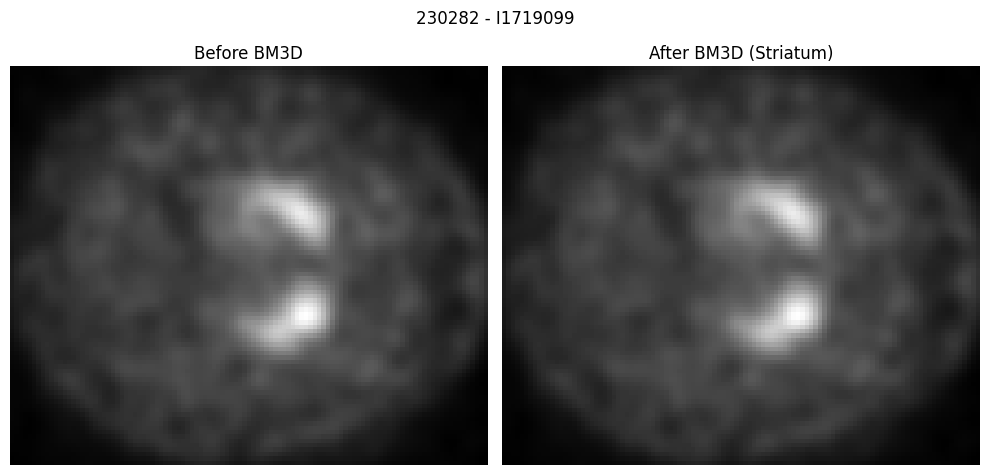


[1339/3834] BM3D denoising: patient 230283 - image I10890683
→ Estimated sigma: 0.0069
→ Striatum slices: 31 to 45 (center=38)


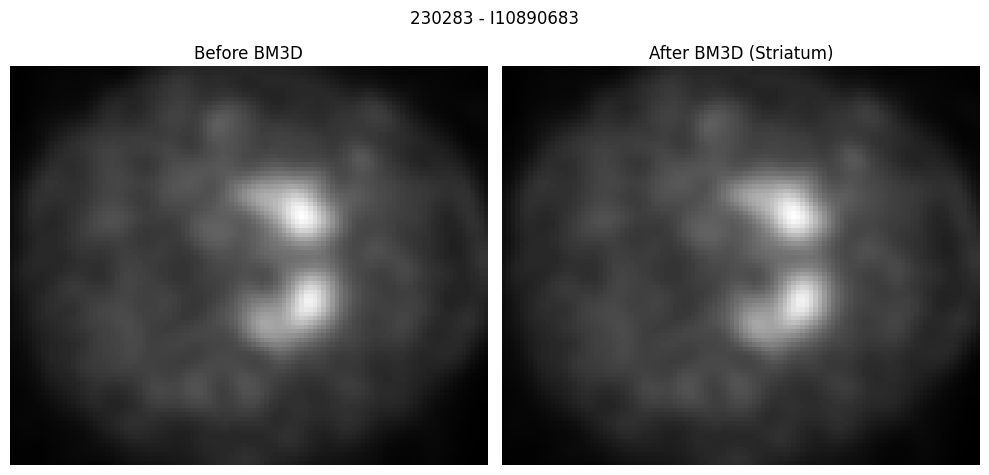


[1340/3834] BM3D denoising: patient 230283 - image I1707272
→ Estimated sigma: 1.9484
→ Striatum slices: 32 to 46 (center=39)


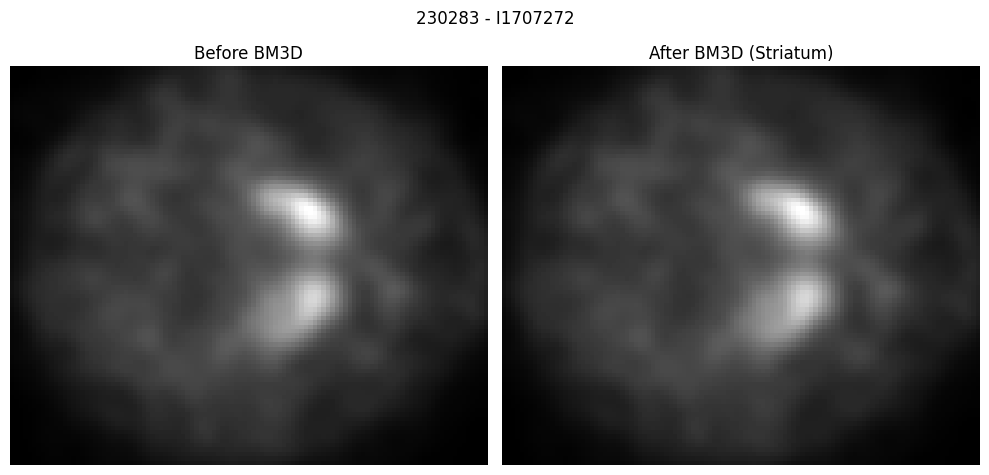


[1341/3834] BM3D denoising: patient 230295 - image I10928495
→ Estimated sigma: 0.0014
→ Striatum slices: 34 to 48 (center=41)


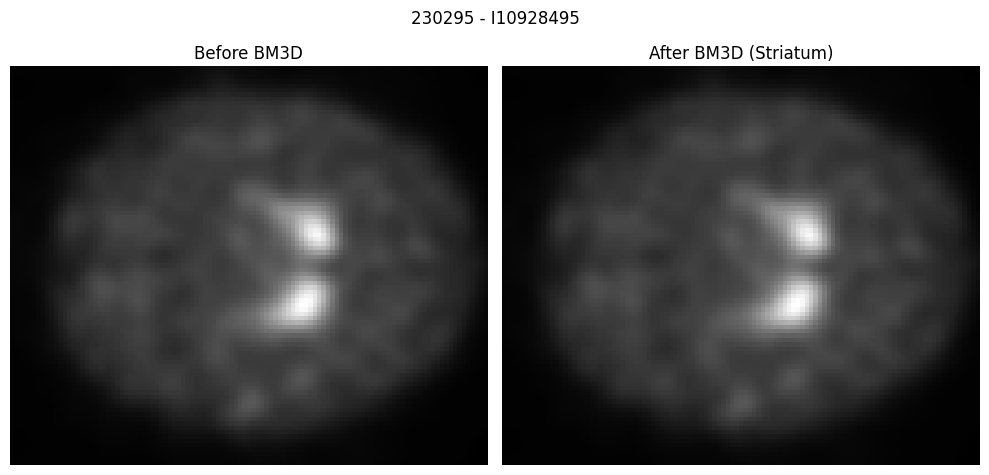


[1342/3834] BM3D denoising: patient 230391 - image I10381242
→ Estimated sigma: 0.0031
→ Striatum slices: 31 to 45 (center=38)


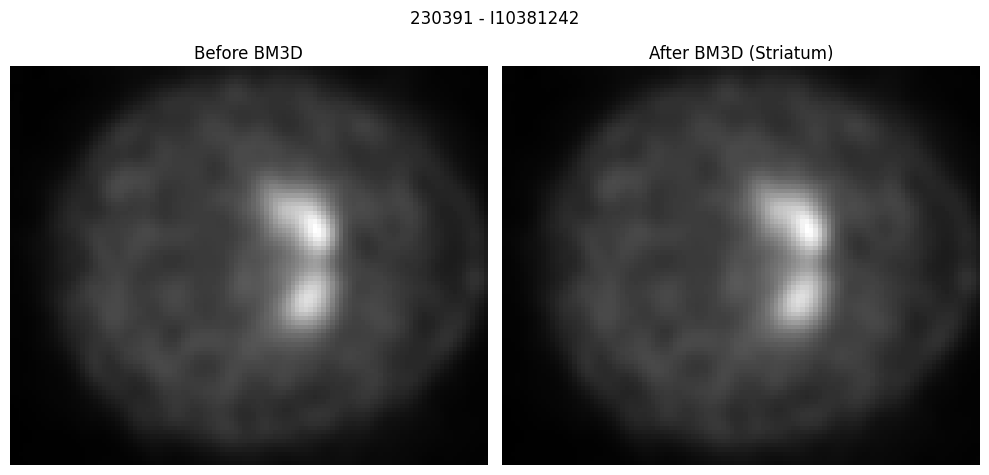


[1343/3834] BM3D denoising: patient 230885 - image I10381252
→ Estimated sigma: 0.0010
→ Striatum slices: 31 to 45 (center=38)


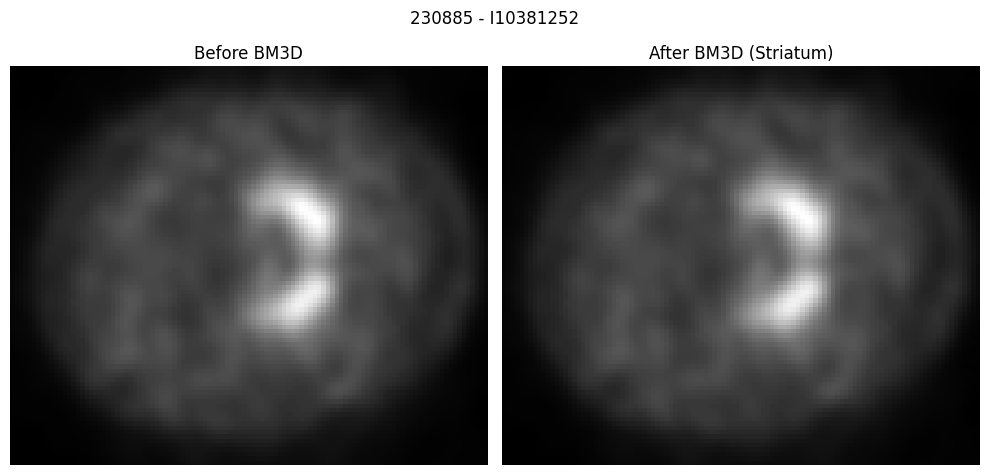


[1344/3834] BM3D denoising: patient 231048 - image I10928496
→ Estimated sigma: 0.0007
→ Striatum slices: 32 to 46 (center=39)


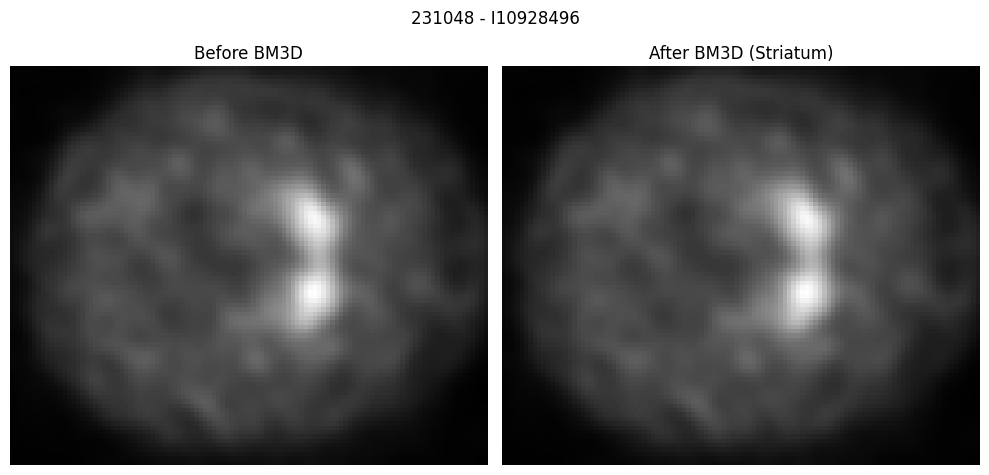


[1345/3834] BM3D denoising: patient 231048 - image I1707273
→ Estimated sigma: 0.5674
→ Striatum slices: 32 to 46 (center=39)


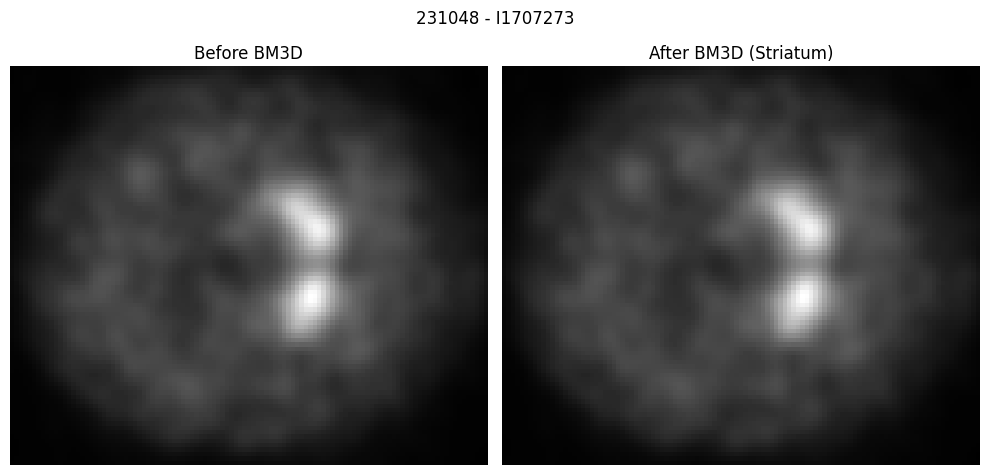


[1346/3834] BM3D denoising: patient 231983 - image I10677146
→ Estimated sigma: 0.0019
→ Striatum slices: 31 to 45 (center=38)


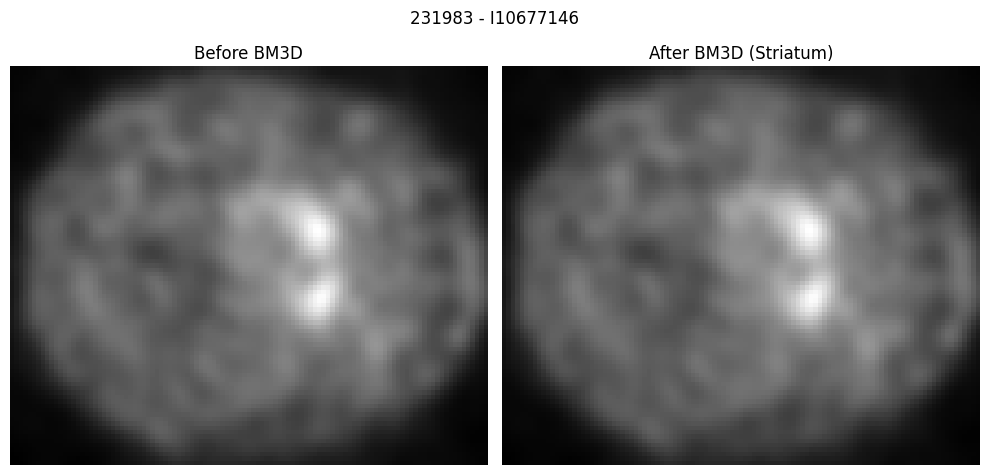


[1347/3834] BM3D denoising: patient 231983 - image I1719100
→ Estimated sigma: 1.4865
→ Striatum slices: 29 to 43 (center=36)


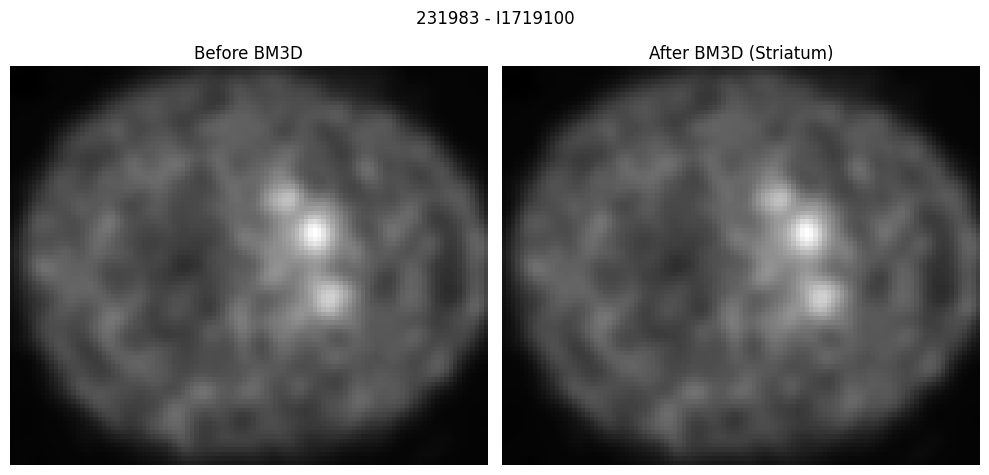


[1348/3834] BM3D denoising: patient 232109 - image I1719101
→ Estimated sigma: 0.4323
→ Striatum slices: 32 to 46 (center=39)

[1349/3834] BM3D denoising: patient 232204 - image I1719102
→ Estimated sigma: 0.6098
→ Striatum slices: 33 to 47 (center=40)

[1350/3834] BM3D denoising: patient 233039 - image I10381518
→ Estimated sigma: 0.0014
→ Striatum slices: 30 to 44 (center=37)

[1351/3834] BM3D denoising: patient 233039 - image I11037886
→ Estimated sigma: 0.0010
→ Striatum slices: 30 to 44 (center=37)

[1352/3834] BM3D denoising: patient 233103 - image I10396576
→ Estimated sigma: 0.0023
→ Striatum slices: 29 to 43 (center=36)

[1353/3834] BM3D denoising: patient 233667 - image I10381529
→ Estimated sigma: 0.0020
→ Striatum slices: 31 to 45 (center=38)

[1354/3834] BM3D denoising: patient 233935 - image I10381534
→ Estimated sigma: 0.0242
→ Striatum slices: 30 to 44 (center=37)

[1355/3834] BM3D denoising: patient 234354 - image I10396579
→ Estimated sigma: 0.0019
→ Striatum slices:

C:\Users\pc\AppData\Local\Temp\ipykernel_7140\85822151.py:46: UserWarning: image is size 2 on the last axis, but channel_axis is None. If this is a color image, please set channel_axis=-1 for proper noise estimation.
  sigma_est = np.mean(estimate_sigma(data, channel_axis=None))


→ Estimated sigma: 0.5628
→ Striatum slices: 199 to 119 (center=206)

[1809/3834] BM3D denoising: patient 3078 - image I342176
→ Estimated sigma: 1.2060
→ Striatum slices: 31 to 45 (center=38)

[1810/3834] BM3D denoising: patient 3078 - image I419240
→ Estimated sigma: 0.0014
→ Striatum slices: 31 to 45 (center=38)

[1811/3834] BM3D denoising: patient 3078 - image I446106
→ Estimated sigma: 0.0013
→ Striatum slices: 31 to 45 (center=38)

[1812/3834] BM3D denoising: patient 3080 - image I343849
→ Estimated sigma: 2.2228
→ Striatum slices: 33 to 47 (center=40)

[1813/3834] BM3D denoising: patient 3080 - image I419551
→ Estimated sigma: 0.0024
→ Striatum slices: 31 to 45 (center=38)

[1814/3834] BM3D denoising: patient 3080 - image I468263
→ Estimated sigma: 0.0054
→ Striatum slices: 32 to 46 (center=39)

[1815/3834] BM3D denoising: patient 308049 - image I10382381
→ Estimated sigma: 0.0043
→ Striatum slices: 31 to 45 (center=38)

[1816/3834] BM3D denoising: patient 3081 - image I343850
→

C:\Users\pc\AppData\Local\Temp\ipykernel_7140\85822151.py:46: UserWarning: image is size 1 on the last axis, but channel_axis is None. If this is a color image, please set channel_axis=-1 for proper noise estimation.
  sigma_est = np.mean(estimate_sigma(data, channel_axis=None))



[2320/3834] BM3D denoising: patient 3378 - image I355205
→ Estimated sigma: 0.9983
→ Striatum slices: 31 to 45 (center=38)

[2321/3834] BM3D denoising: patient 3378 - image I418678
→ Estimated sigma: 1.1601
→ Striatum slices: 31 to 45 (center=38)

[2322/3834] BM3D denoising: patient 3378 - image I449021
→ Estimated sigma: 1.0165
→ Striatum slices: 29 to 43 (center=36)

[2323/3834] BM3D denoising: patient 3380 - image I354335
→ Estimated sigma: 0.8055
→ Striatum slices: 30 to 44 (center=37)

[2324/3834] BM3D denoising: patient 3380 - image I418679
→ Estimated sigma: 0.7017
→ Striatum slices: 31 to 45 (center=38)

[2325/3834] BM3D denoising: patient 3380 - image I468270
→ Estimated sigma: 0.4978
→ Striatum slices: 0 to 13 (center=6)

[2326/3834] BM3D denoising: patient 3380 - image I913196
→ Estimated sigma: 1.2225
→ Striatum slices: 31 to 45 (center=38)

[2327/3834] BM3D denoising: patient 3383 - image I355208
→ Estimated sigma: 1.2443
→ Striatum slices: 31 to 45 (center=38)

[2328/383

In [ ]:
total_images = sum(
    1 for root, _, files in os.walk(nifti_path)
    for f in files if f.endswith(".nii") or f.endswith(".nii.gz")
)
processed_count = 0
displayed_count = 0
failed_denoising = []


denoised_path = "Dataset/datscan_images/bm3d_striatum/Denoised_NIfTI"
os.makedirs(denoised_path, exist_ok=True)

STRIATUM_HALF_WIDTH = 7  # ±7 slices → 15 slices total


for root, _, files in os.walk(nifti_path):
    for file in files:
        if not (file.endswith(".nii") or file.endswith(".nii.gz")):
            continue

        processed_count += 1

        patient_id = os.path.basename(root)
        img_id = os.path.splitext(os.path.splitext(file)[0])[0]

        input_path = os.path.join(root, file)

        patient_output_dir = os.path.join(denoised_path, patient_id)
        os.makedirs(patient_output_dir, exist_ok=True)

        output_file = os.path.join(patient_output_dir, f"{img_id}.nii.gz")

        # SKIP if already done
        if os.path.exists(output_file):
            print(f"[✔] Skipping: {patient_id} - {img_id}")
            continue

        print(f"\n[{processed_count}/{total_images}] BM3D denoising: patient {patient_id} - image {img_id}")

        try:
            # Load image
            img = nib.load(input_path)
            data = img.get_fdata()

            # Estimate noise sigma
            sigma_est = np.mean(estimate_sigma(data, channel_axis=None))
            print(f"→ Estimated sigma: {sigma_est:.4f}")

            # Locate striatum
            slice_energy = data.sum(axis=(0, 1))
            center_slice = np.argmax(slice_energy)

            z_start = max(0, center_slice - STRIATUM_HALF_WIDTH)
            z_end   = min(data.shape[2], center_slice + STRIATUM_HALF_WIDTH + 1)

            print(f"→ Striatum slices: {z_start} to {z_end - 1} (center={center_slice})")

            # Initialize output
            denoised_data = data.copy()

            # BM3D on striatum only
            for z in range(z_start, z_end):
                slice_img = data[:, :, z]

                denoised_slice = bm3d(
                    slice_img,
                    sigma_psd=sigma_est,
                    profile=BM3DProfile()
                )

                denoised_data[:, :, z] = denoised_slice

            # Display BEFORE/AFTER
            if displayed_count < MAX_DISPLAYED:
                mid = center_slice

                fig, axes = plt.subplots(1, 2, figsize=(10, 5))
                plt.suptitle(f"{patient_id} - image {img_id}")

                display_nifti_img(data, ax=axes[0], title="Before")
                display_nifti_img(denoised_data, ax=axes[1], title="After Denoising BM3D (Striatum)")

                plt.tight_layout()
                plt.show()

                displayed_count += 1

            # Save denoised image
            nib.save(
                nib.Nifti1Image(denoised_data, affine=img.affine, header=img.header),
                output_file
            )

        except Exception as e:
            print(f"[✘] Failed: {patient_id}/{img_id} → {e}")
            failed_denoising.append(f"{patient_id}/{img_id}")


# ==== FINAL SUMMARY ====
print("\n" + "=" * 50)
if not failed_denoising:
    print("✅ All images denoised successfully.")
else:
    print(f"⚠ {len(failed_denoising)} images failed to denoise:")
    for img_name in failed_denoising:
        print(f" -", img_name)

### 4. Normalizing (Z-score)

[✔] Skipping (already processed): 100001 - I10960001
[✔] Skipping (already processed): 100001 - I1452480
[✔] Skipping (already processed): 100001 - I1518598
[✔] Skipping (already processed): 100001 - I1530341
[✔] Skipping (already processed): 100001 - I1582833
[✔] Skipping (already processed): 100001 - I1660691
[✔] Skipping (already processed): 100002 - I1474774
[✔] Skipping (already processed): 100002 - I1537899
[✔] Skipping (already processed): 100004 - I1461542
[✔] Skipping (already processed): 100005 - I1461543
[✔] Skipping (already processed): 100006 - I1461544
[✔] Skipping (already processed): 100007 - I1461545
[✔] Skipping (already processed): 100012 - I1461546
[✔] Skipping (already processed): 100017 - I1474775
[✔] Skipping (already processed): 100017 - I1619847
[✔] Skipping (already processed): 100018 - I1461547
[✔] Skipping (already processed): 100267 - I10380475
[✔] Skipping (already processed): 100267 - I1461548
[✔] Skipping (already processed): 100268 - I1461549
[✔] Skippi

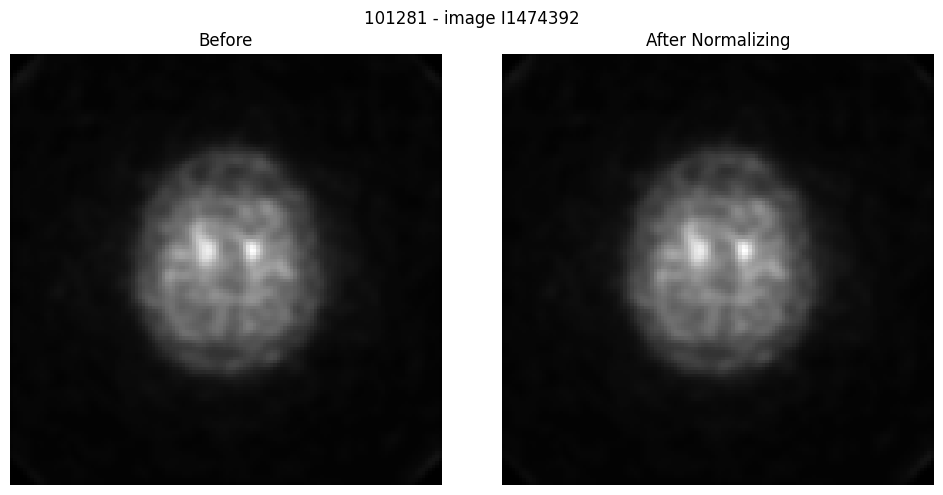

[✔] Skipping (already processed): 101291 - I1474393
[✔] Skipping (already processed): 101295 - I10395068
[✔] Skipping (already processed): 101295 - I1474394
[✔] Skipping (already processed): 101317 - I1474395
[✔] Skipping (already processed): 101329 - I1474396
[✔] Skipping (already processed): 101330 - I10380522
[✔] Skipping (already processed): 101330 - I1474397
[✔] Skipping (already processed): 101335 - I1474411
[✔] Skipping (already processed): 101344 - I10380524
[✔] Skipping (already processed): 101344 - I1474782
[✔] Skipping (already processed): 101384 - I1474398
[✔] Skipping (already processed): 101476 - I1474783
[✔] Skipping (already processed): 101476 - I1616057
[✔] Skipping (already processed): 101477 - I10380530
[✔] Skipping (already processed): 101477 - I1474399
[✔] Skipping (already processed): 101477 - I1644809
[✔] Skipping (already processed): 101479 - I1474784
[✔] Skipping (already processed): 101480 - I1486050
[✔] Skipping (already processed): 101482 - I10395069
[✔] Ski

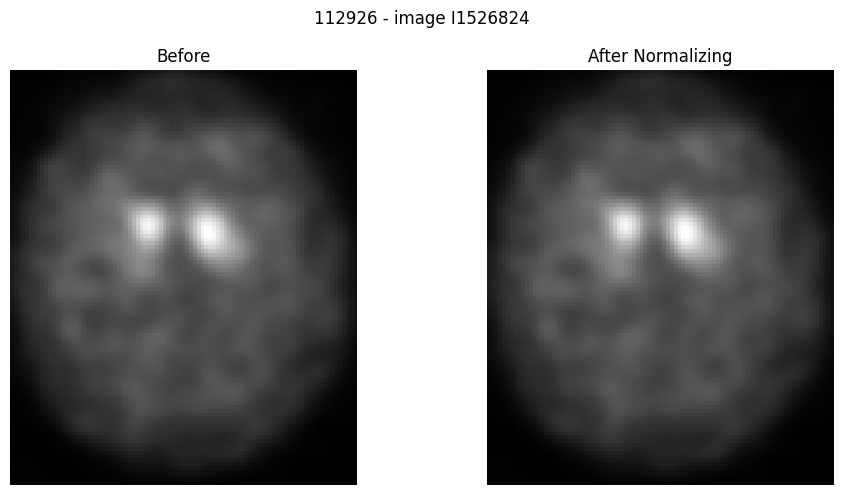


[270/788] Normalizing: patient 112926 - image I1660670....


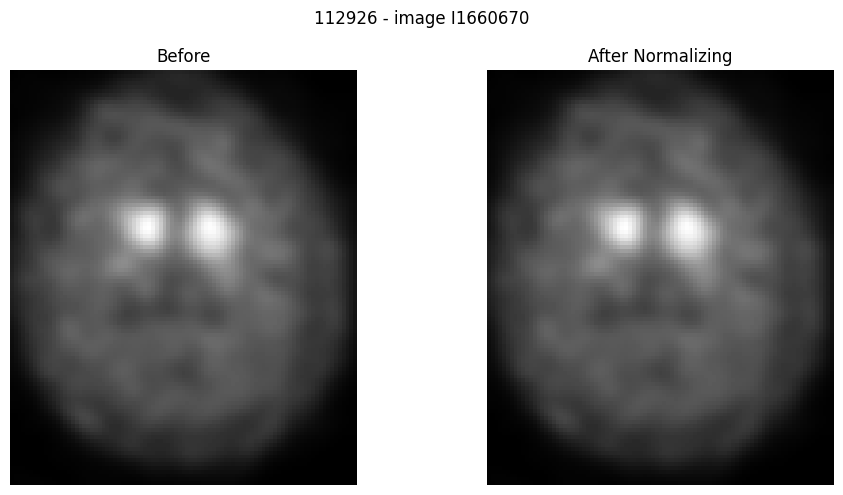


[271/788] Normalizing: patient 113043 - image I1542904....


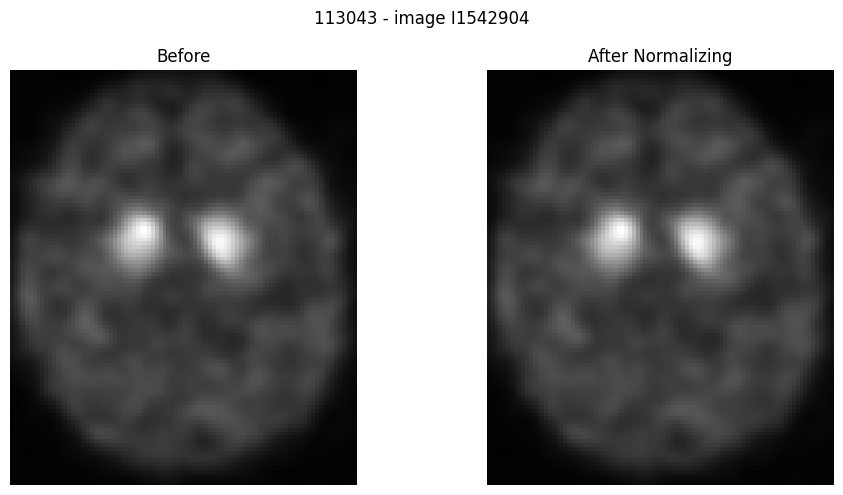


[272/788] Normalizing: patient 113050 - image I1526825....


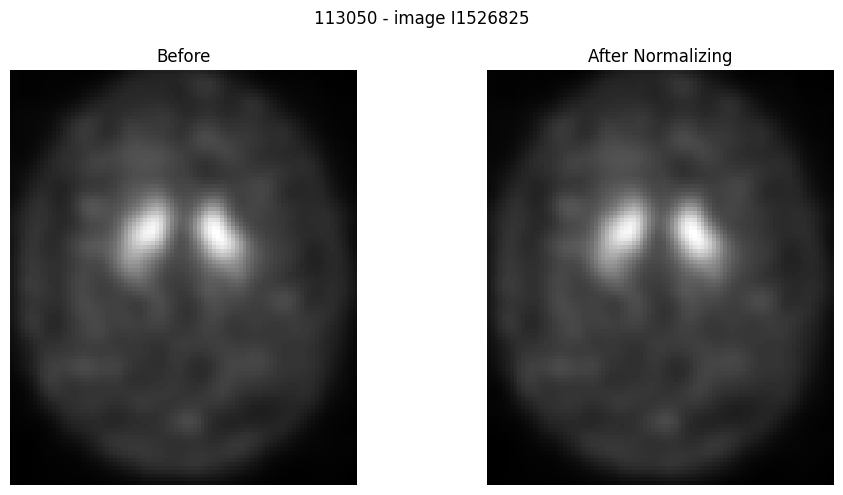


[273/788] Normalizing: patient 113355 - image I11083549....


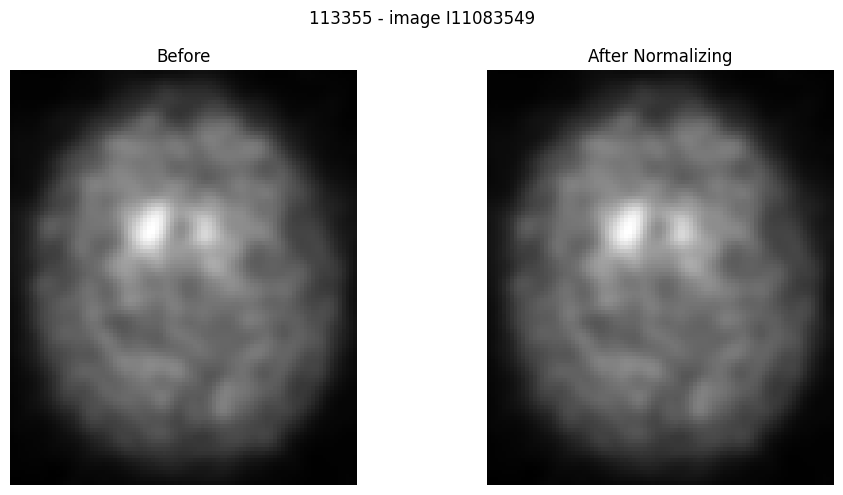


[274/788] Normalizing: patient 113355 - image I1526826....


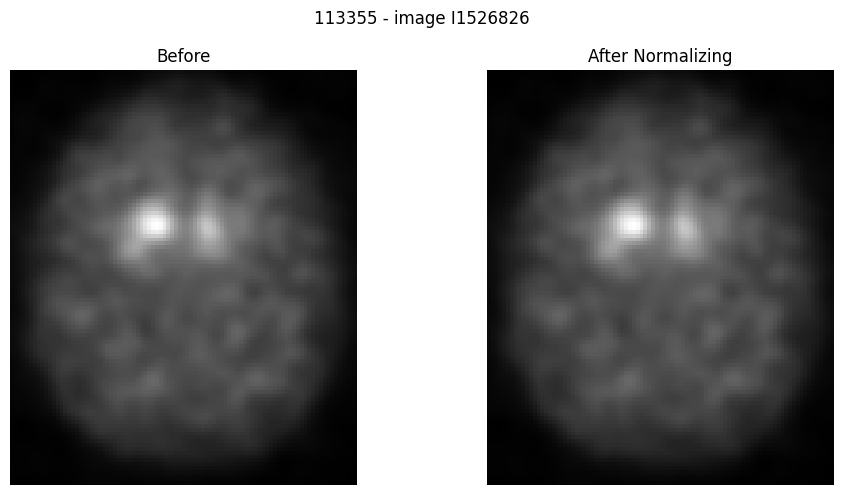


[275/788] Normalizing: patient 113355 - image I1671687....


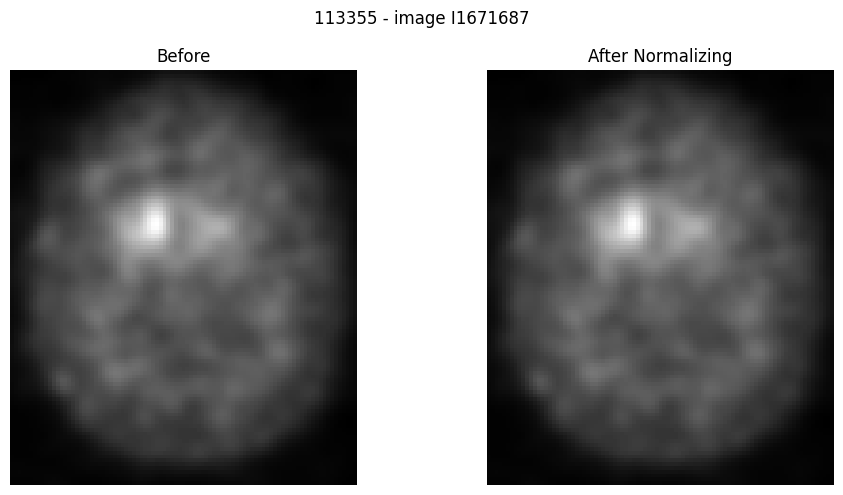


[276/788] Normalizing: patient 113366 - image I1665807....


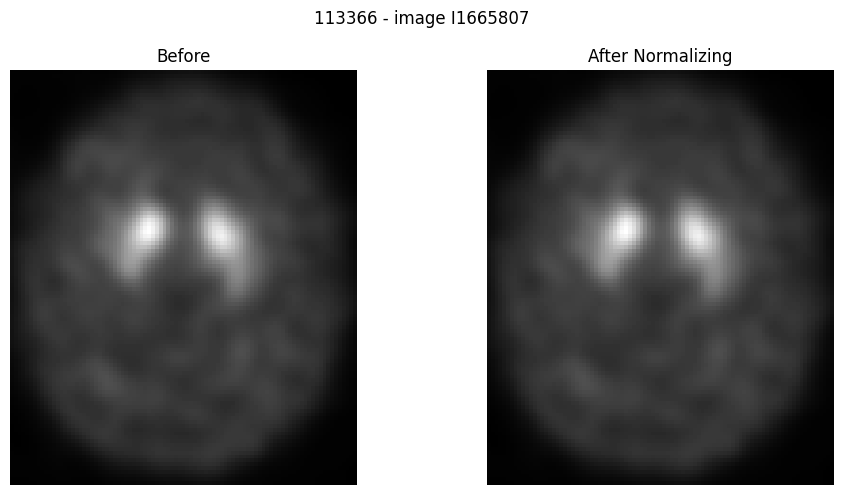


[277/788] Normalizing: patient 113369 - image I1526827....


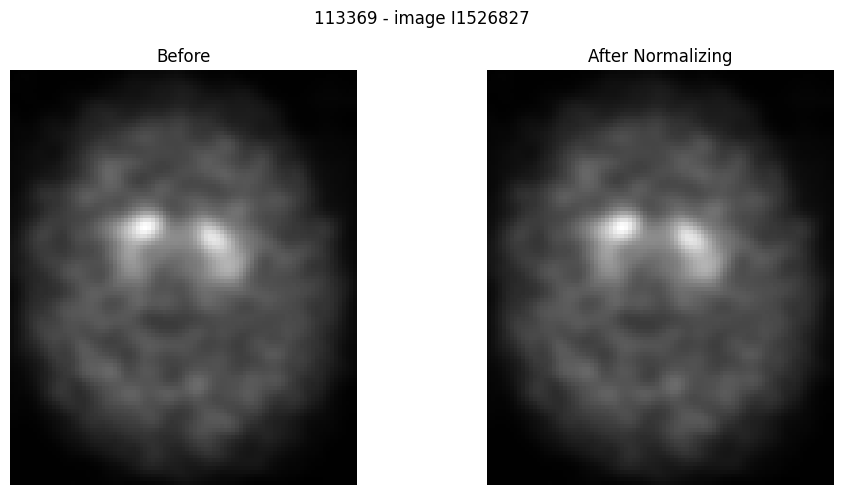


[278/788] Normalizing: patient 113446 - image I1529619....

[279/788] Normalizing: patient 113447 - image I1529620....

[280/788] Normalizing: patient 113460 - image I10380607....

[281/788] Normalizing: patient 113460 - image I10676999....

[282/788] Normalizing: patient 113460 - image I1526828....

[283/788] Normalizing: patient 113672 - image I1571461....

[284/788] Normalizing: patient 113905 - image I1529621....

[285/788] Normalizing: patient 114126 - image I1526829....

[286/788] Normalizing: patient 114137 - image I11083550....

[287/788] Normalizing: patient 114137 - image I1623685....

[288/788] Normalizing: patient 114195 - image I11083551....

[289/788] Normalizing: patient 114195 - image I1529622....

[290/788] Normalizing: patient 114195 - image I1671494....

[291/788] Normalizing: patient 114264 - image I1571462....

[292/788] Normalizing: patient 114265 - image I1542905....

[293/788] Normalizing: patient 114269 - image I1571463....

[294/788] Normalizing: patient 1142

In [14]:
total_images = sum(
    1 for root, dirs, files in os.walk(denoised_path)
    for file in files if file.endswith(".nii") or file.endswith(".nii.gz")
)
processed_count = 0
displayed_count = 0
failed_normalization = []


normalized_path = "Dataset/datscan_images/bm3d_full/unpaired/Normalized_NIfTI"
os.makedirs(normalized_path, exist_ok=True)

for root, dirs, files in os.walk(denoised_path):
    for file in files:
        if file.endswith(".nii") or file.endswith(".nii.gz"):
            processed_count += 1

            patient_id = os.path.basename(root)
            img_id = os.path.splitext(os.path.splitext(file)[0])[0]

            input_path = os.path.join(root, file)

            patient_output_dir = os.path.join(normalized_path, patient_id)
            os.makedirs(patient_output_dir, exist_ok=True)
            output_file = os.path.join(patient_output_dir, f"{img_id}.nii.gz")

            # SKIP if already done
            if os.path.exists(output_file):
                print(f"[✔] Skipping (already processed): {patient_id} - {img_id}")
                continue

            print(f"\n[{processed_count}/{total_images}] Normalizing: patient {patient_id} - image {img_id}....")
            
            try:
                # Load image
                img = nib.load(input_path)
                data = img.get_fdata()

                # ==========OPTION 01==========
                # Z-score normalization
                # non_zero_data = data[data > 0]
                # mean = np.mean(non_zero_data)
                # std = np.std(non_zero_data)
                mean = np.mean(data)
                std = np.std(data)

                # Avoid division by zero
                if std == 0:
                    print(f"[⚠️] Std is zero for {patient_id} image {img_id}, skipping normalization.")
                    # normalized_data = data
                    normalized_data = data - mean
                else:
                    # normalized_data = np.where( data > 0, (data - mean) / std, 0)
                    normalized_data = (data - mean) / std

                # ==========OPTION 02==========
                # Min-Max Normalization
                # data_min = np.min(data)
                # data_max = np.max(data)

                # if data_max == data_min:
                #     print(f"[⚠️] Constant image for {patient_id} - {img_id}, skipping normalization.")
                #     normalized_data = data
                # else:
                #     normalized_data = (data - data_min) / (data_max - data_min)

                # Display BEFORE/AFTER
                if displayed_count < MAX_DISPLAYED:
                    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
                    plt.suptitle(f"{patient_id} - image {img_id}")

                    display_nifti_img(data, ax=axes[0], title="Before")
                    display_nifti_img(normalized_data, ax=axes[1], title="After Normalizing")

                    plt.tight_layout()
                    plt.show()

                    displayed_count += 1

                # Save normalized file
                nib.save(
                    nib.Nifti1Image(normalized_data, affine=img.affine, header=img.header),
                    output_file
                )

            except Exception as e:
                print(f"[✘] Failed to normalize {patient_id}/{img_id}: {e}")
                failed_normalization.append(f"{patient_id}/{img_id}")


# ==== FINAL SUMMARY ====
print("\n" + "="*50)
if not failed_normalization:
    print("✅ All images normalized successfully.")
else:
    print(f"⚠ {len(failed_normalization)} images failed to normalize:")
    for img_name in failed_normalization:
        print(f" - {img_name}")

### 5. Striatum-centered Cropping

In [16]:
wrong_shape_files = []

expected_shape = (91, 109, 91)

for root, _, files in os.walk(normalized_path):
    for file in files:
        if file.endswith(('.nii', '.nii.gz')):
            path = os.path.join(root, file)
            try:
                img = nib.load(path)
                actual_shape = img.shape
                if actual_shape != expected_shape:
                    wrong_shape_files.append((path, actual_shape))
            except Exception as e:
                print(f"⚠️ Could not read {file}: {e}")

print(f"\n✅ Found {len(wrong_shape_files)} images with wrong shape (not {expected_shape})")


for p, shape in wrong_shape_files:
    print(f"{p} → shape: {shape}")


✅ Found 1 images with wrong shape (not (91, 109, 91))
Dataset/datscan_images/bm3d_full/unpaired/Normalized_NIfTI\101281\I1474392.nii.gz → shape: (128, 128, 48)


In [17]:
#  delete wrong-shape images 
for path, shape in wrong_shape_files:
    try:
        if os.path.exists(path):
            os.remove(path)
            print(f"Deleted: {path} (shape={shape})")
    except Exception as e:
        print(f"Failed to delete {path}: {e}")


#  remove empty patient folders
for patient_id in os.listdir(normalized_path):
    patient_path = os.path.join(normalized_path, patient_id)

    # Skip anything that is not a directory
    if not os.path.isdir(patient_path):
        continue

    # Check if patient still has any NIfTI files
    has_nifti = False
    for root, _, files in os.walk(patient_path):
        for f in files:
            if f.endswith(".nii") or f.endswith(".nii.gz"):
                has_nifti = True
                break
        if has_nifti:
            break

    # remove patient folder if no NIfTI files
    if not has_nifti:
        try:
            shutil.rmtree(patient_path)
            print(f"Removed empty patient folder: {patient_path}")
        except Exception as e:
            print(f"Failed to remove {patient_path}: {e}")

Deleted: Dataset/datscan_images/bm3d_full/unpaired/Normalized_NIfTI\101281\I1474392.nii.gz (shape=(128, 128, 48))
Removed empty patient folder: Dataset/datscan_images/bm3d_full/unpaired/Normalized_NIfTI\101281



[1/787] Cropping: patient 100001 - image I10960001....


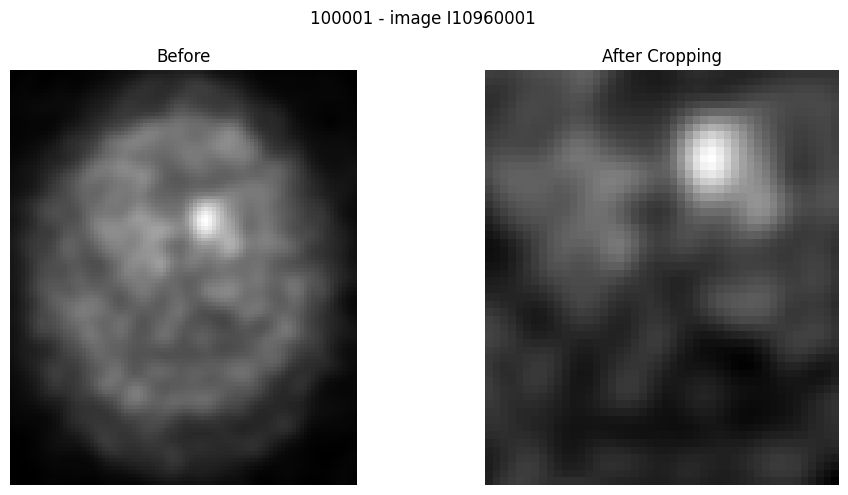


[2/787] Cropping: patient 100001 - image I1452480....


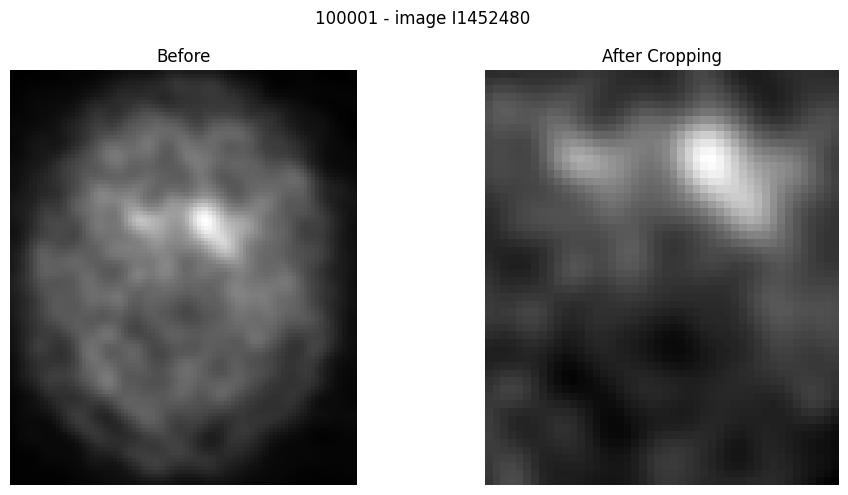


[3/787] Cropping: patient 100001 - image I1518598....


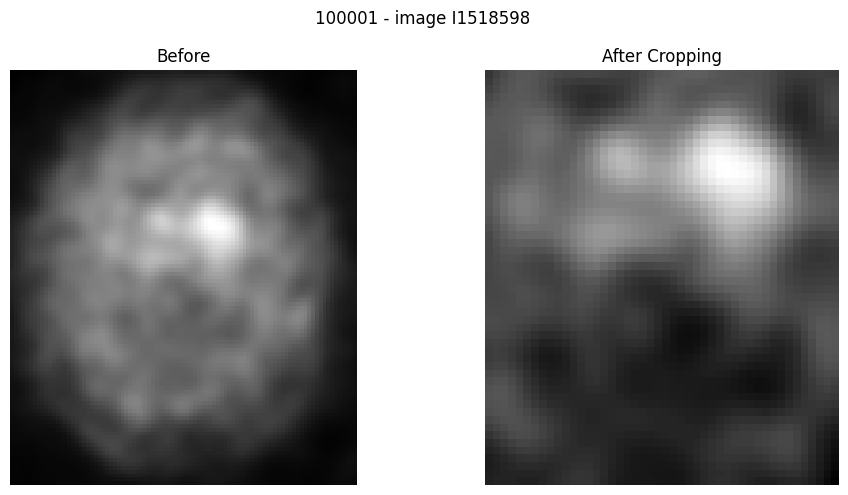


[4/787] Cropping: patient 100001 - image I1530341....


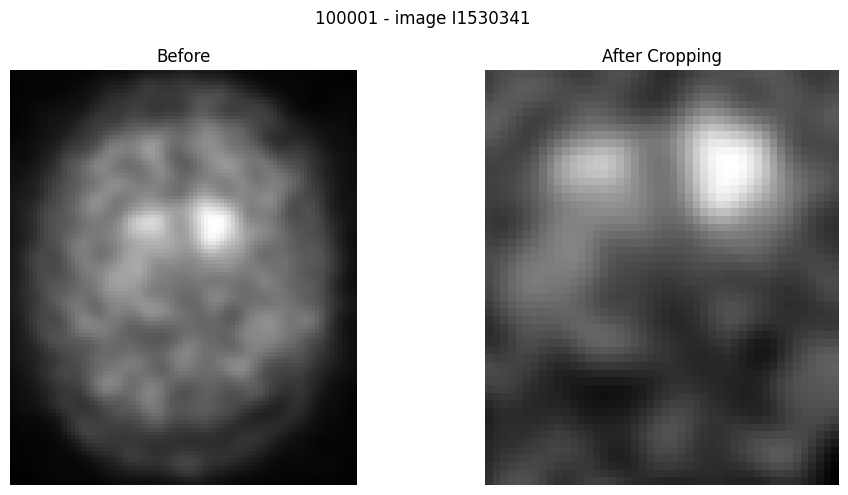


[5/787] Cropping: patient 100001 - image I1582833....


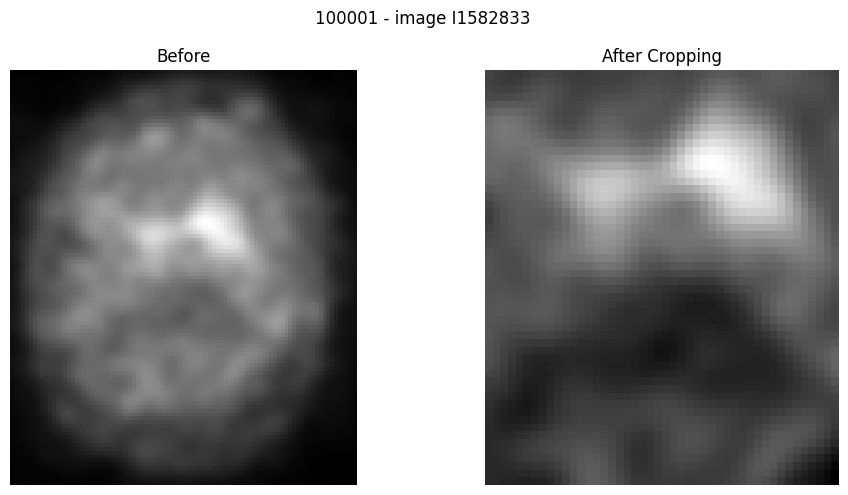


[6/787] Cropping: patient 100001 - image I1660691....


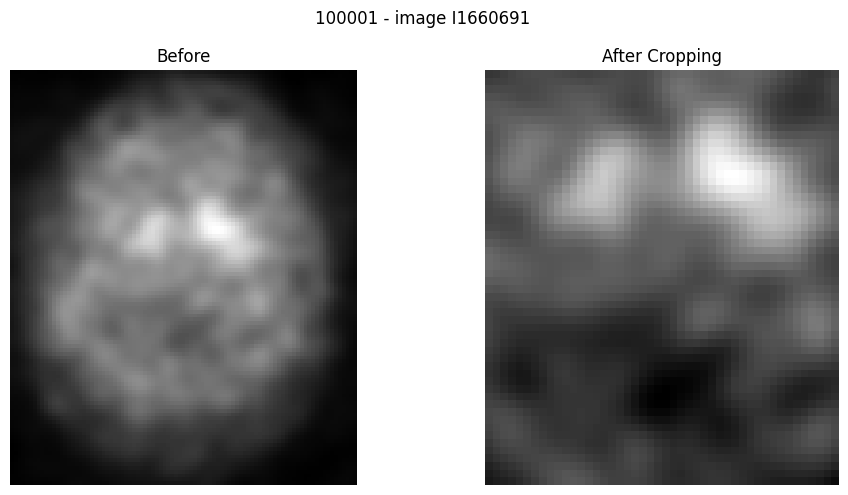


[7/787] Cropping: patient 100002 - image I1474774....


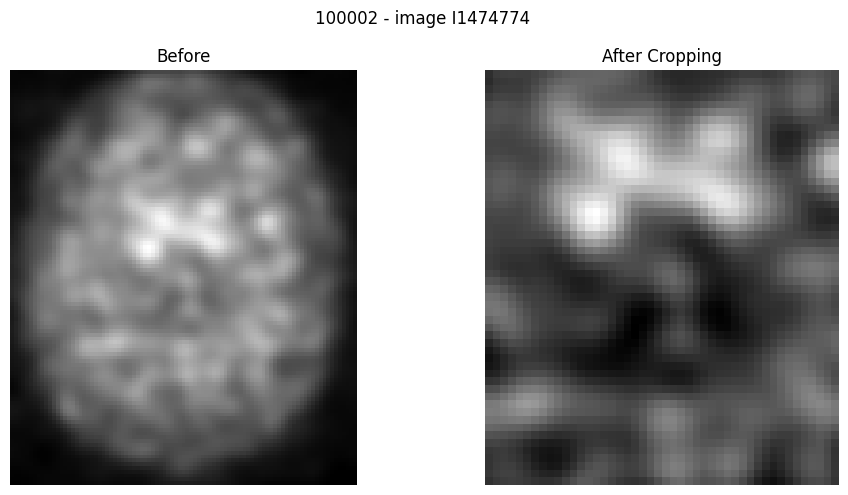


[8/787] Cropping: patient 100002 - image I1537899....


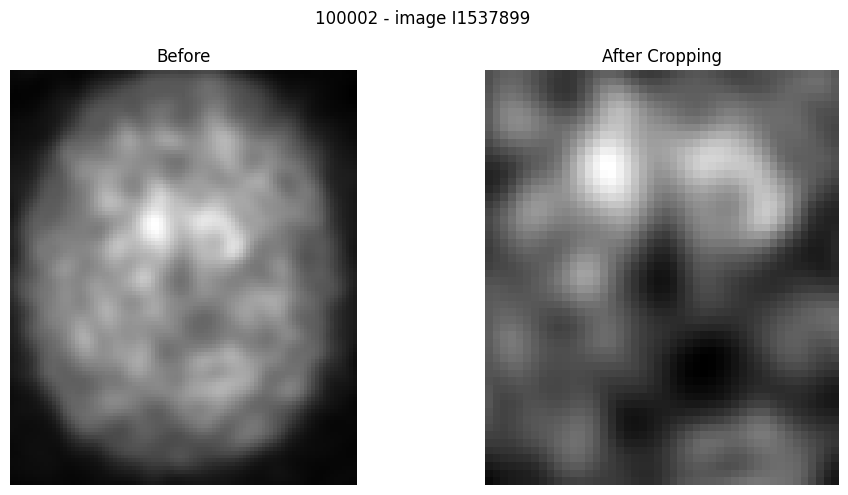


[9/787] Cropping: patient 100004 - image I1461542....


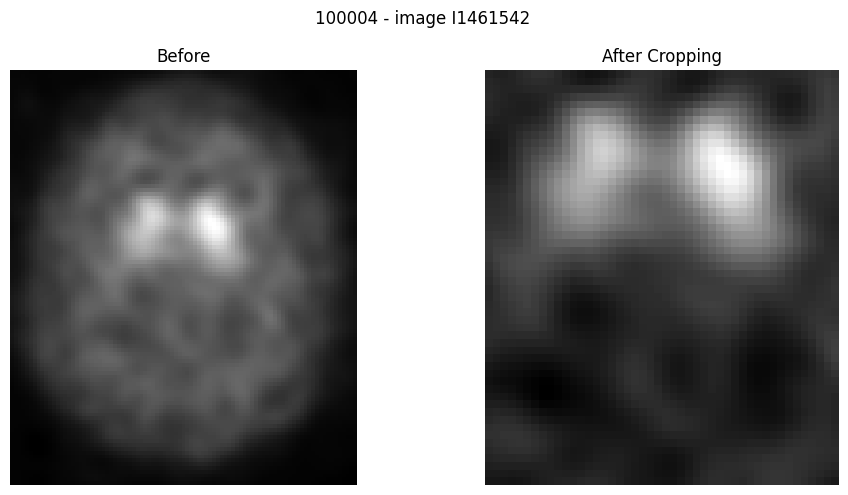


[10/787] Cropping: patient 100005 - image I1461543....


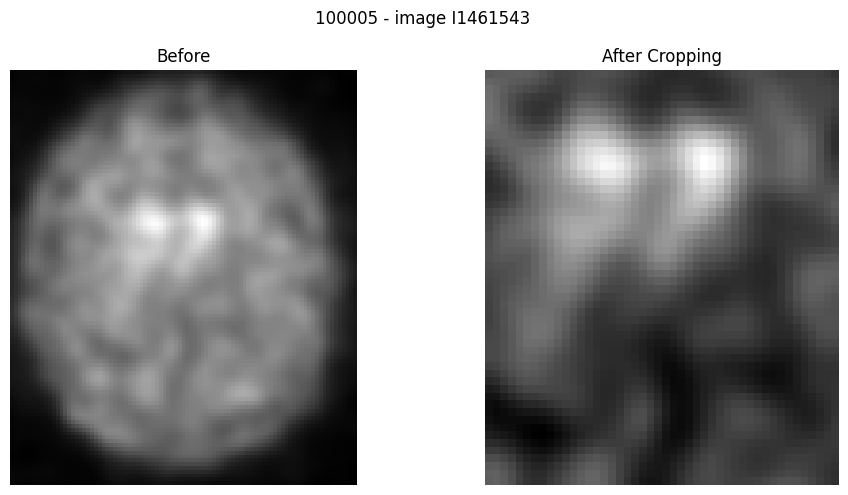


[11/787] Cropping: patient 100006 - image I1461544....

[12/787] Cropping: patient 100007 - image I1461545....

[13/787] Cropping: patient 100012 - image I1461546....

[14/787] Cropping: patient 100017 - image I1474775....

[15/787] Cropping: patient 100017 - image I1619847....

[16/787] Cropping: patient 100018 - image I1461547....

[17/787] Cropping: patient 100267 - image I10380475....

[18/787] Cropping: patient 100267 - image I1461548....

[19/787] Cropping: patient 100268 - image I1461549....

[20/787] Cropping: patient 100268 - image I1616053....

[21/787] Cropping: patient 100639 - image I1474776....

[22/787] Cropping: patient 100738 - image I1461550....

[23/787] Cropping: patient 100842 - image I1461551....

[24/787] Cropping: patient 100842 - image I1573147....

[25/787] Cropping: patient 100878 - image I10380489....

[26/787] Cropping: patient 100878 - image I1461552....

[27/787] Cropping: patient 100889 - image I1461553....

[28/787] Cropping: patient 100889 - image I15

In [18]:
total_images = sum(
    1 for root, dirs, files in os.walk(normalized_path)
    for file in files if file.endswith(".nii") or file.endswith(".nii.gz")
)
processed_count = 0
displayed_count = 0
failed_cropping = []


# ORIGINAL_SHAPE = (91, 109, 91)
CROP_SHAPE = (46, 54, 14)  # (x, y, z)

cropped_path = "Dataset/datscan_images/bm3d_full/unpaired/Cropped_NIfTI"
os.makedirs(cropped_path, exist_ok=True)

for root, dirs, files in os.walk(normalized_path):
    for file in files:
        if file.endswith(".nii") or file.endswith(".nii.gz"):
            processed_count += 1

            patient_id = os.path.basename(root)
            img_id = os.path.splitext(os.path.splitext(file)[0])[0]

            input_path = os.path.join(root, file)

            patient_output_dir = os.path.join(cropped_path, patient_id)
            os.makedirs(patient_output_dir, exist_ok=True)
            output_file = os.path.join(patient_output_dir, f"{img_id}.nii.gz")

            # SKIP if already done
            if os.path.exists(output_file):
                print(f"[✔] Skipping (already processed): {patient_id} - {img_id}")
                continue
            
            print(f"\n[{processed_count}/{total_images}] Cropping: patient {patient_id} - image {img_id}....")

            try:
                # Load image
                img = nib.load(input_path)
                data = img.get_fdata()

                # Compute center crop coordinates
                cx, cy, cz = np.array(data.shape) // 2
                dx, dy, dz = np.array(CROP_SHAPE) // 2

                # Crop boundaries
                x_start, x_end = cx - dx, cx + dx
                y_start, y_end = cy - dy, cy + dy
                z_start, z_end = cz - dz, cz + dz

                cropped_data = data[x_start:x_end, y_start:y_end, z_start:z_end]

                # Display BEFORE/AFTER
                if displayed_count < MAX_DISPLAYED:
                    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
                    plt.suptitle(f"{patient_id} - image {img_id}")

                    display_nifti_img(data, ax=axes[0], title="Before")
                    display_nifti_img(cropped_data, ax=axes[1], title="After Cropping")

                    plt.tight_layout()
                    plt.show()

                    displayed_count += 1

                # Save cropped image
                nib.save(
                    nib.Nifti1Image(cropped_data, affine=img.affine, header=img.header),
                    output_file
                )

            except Exception as e:
                print(f"[✘] Failed to crop {patient_id}/{img_id}: {e}")
                failed_cropping.append(f"{patient_id}/{img_id}")


# ==== FINAL SUMMARY ====
print("\n" + "="*50)
if not failed_cropping:
    print("✅ All images cropped successfully.")
else:
    print(f"⚠ {len(failed_cropping)} images failed to crop:")
    for img_name in failed_cropping:
        print(f" - {img_name}")

### Helpful: Computing pixel intensity

[1/3834] patient 100001 - image I10960001


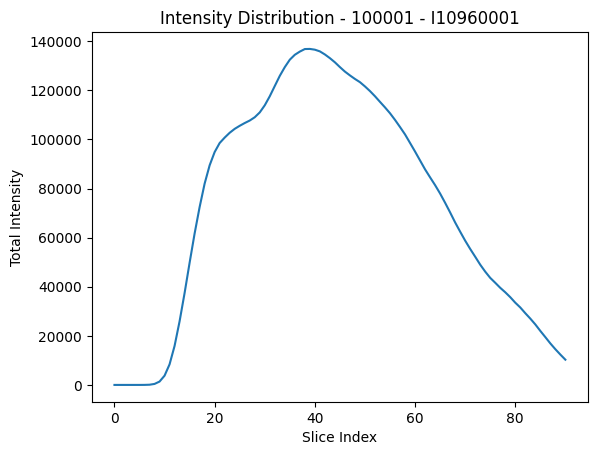

[2/3834] patient 100001 - image I1452480


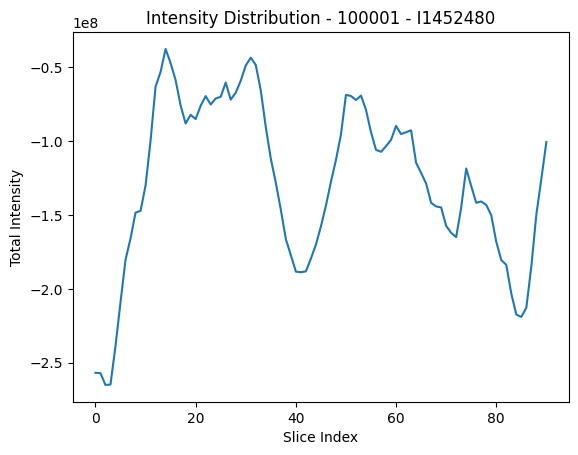

[3/3834] patient 100001 - image I1518598


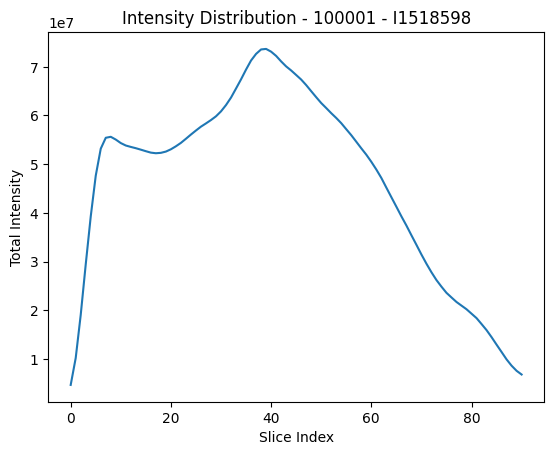

[4/3834] patient 100001 - image I1530341


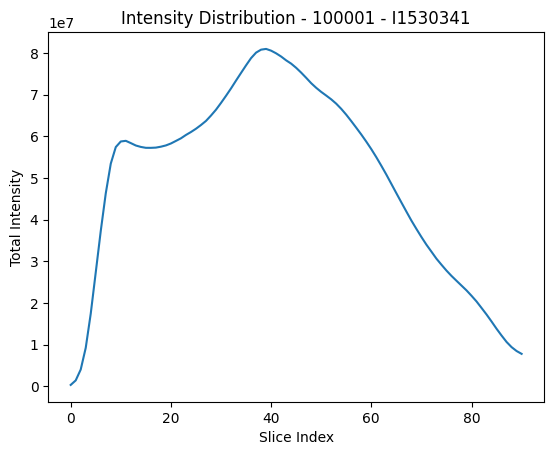

[5/3834] patient 100001 - image I1582833


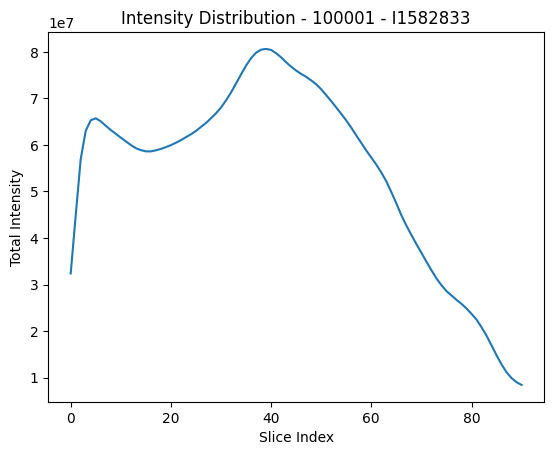

[6/3834] patient 100001 - image I1660691


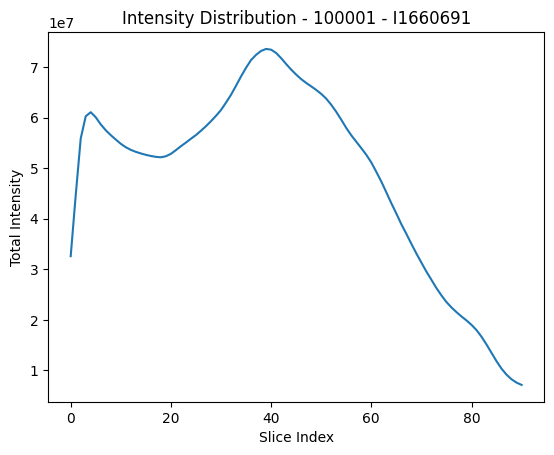

[7/3834] patient 100002 - image I1474774


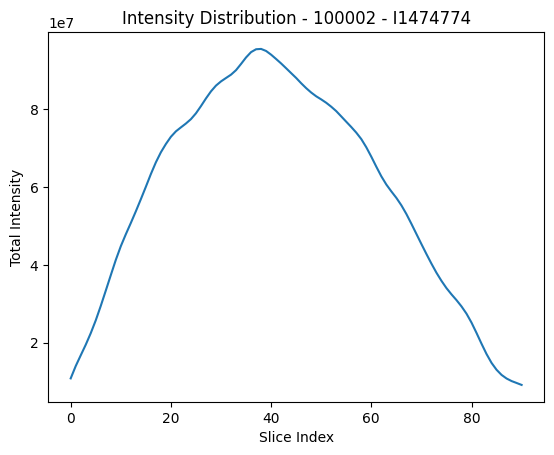

[8/3834] patient 100002 - image I1537899


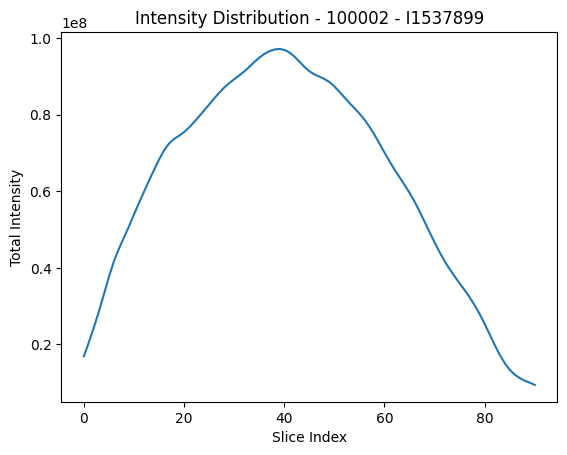

[9/3834] patient 100004 - image I1461542


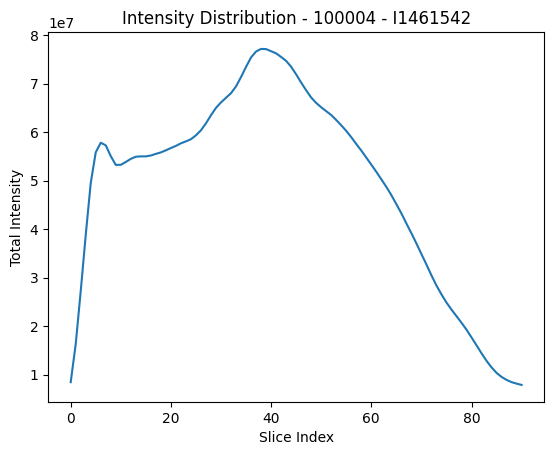

[10/3834] patient 100005 - image I1461543


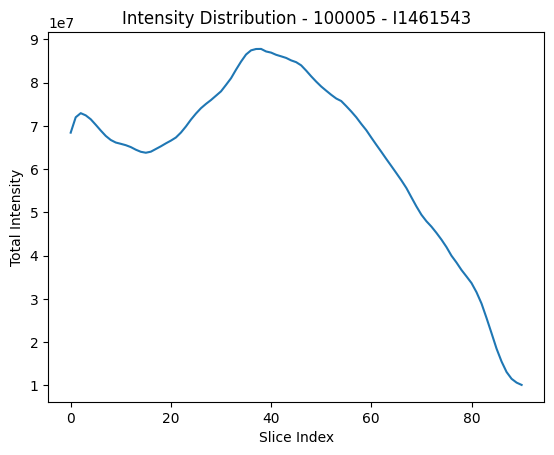

[11/3834] patient 100005 - image I1548448


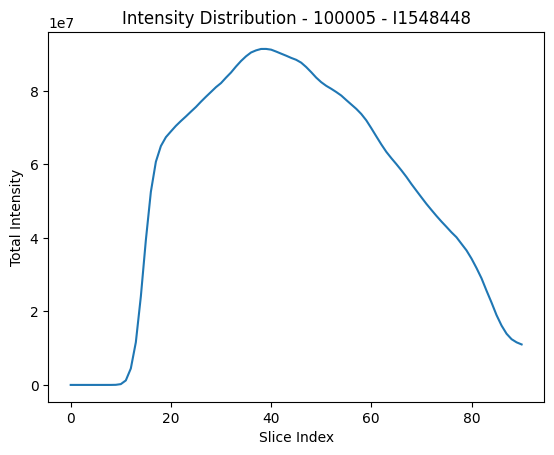

[12/3834] patient 100006 - image I10380466


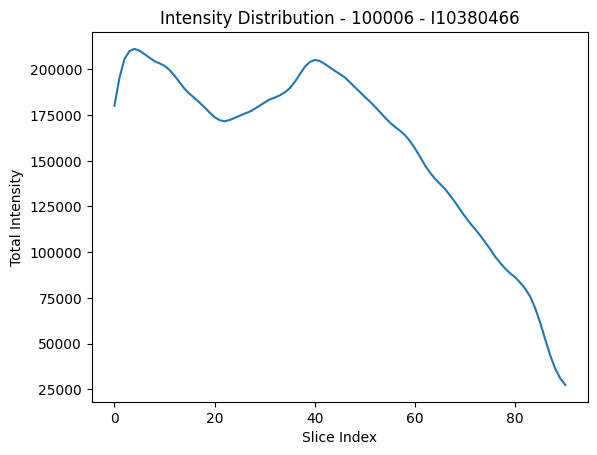

[13/3834] patient 100006 - image I1461544


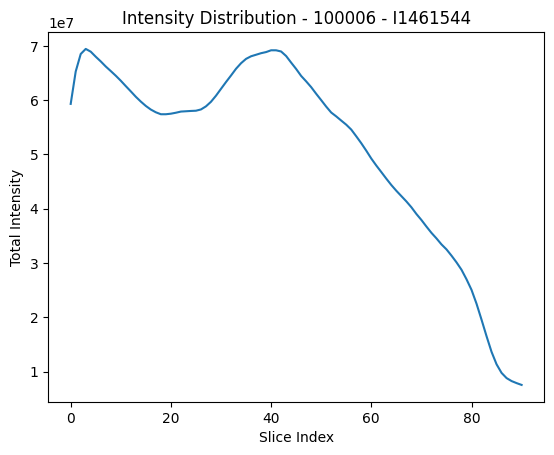

[14/3834] patient 100006 - image I1537900


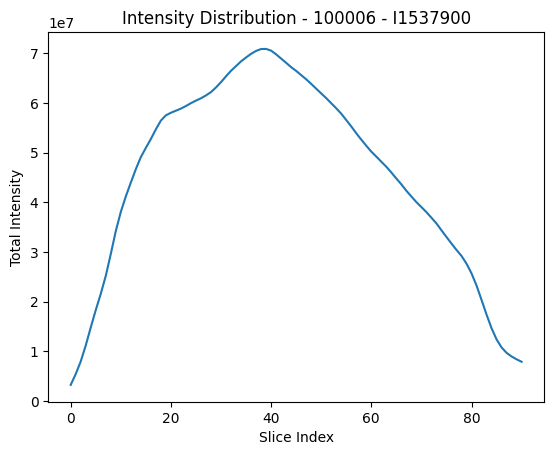

[15/3834] patient 100007 - image I10380467


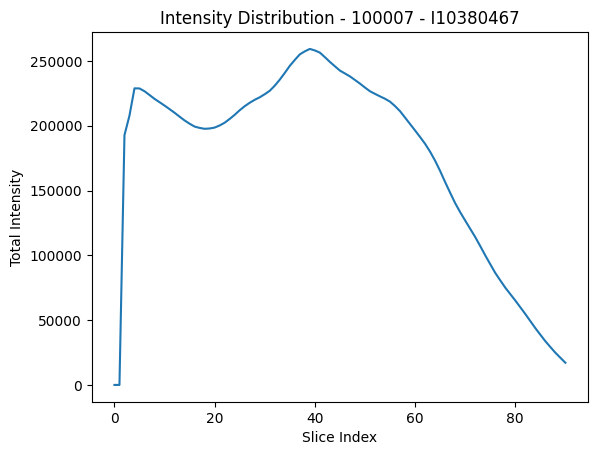

[16/3834] patient 100007 - image I1461545


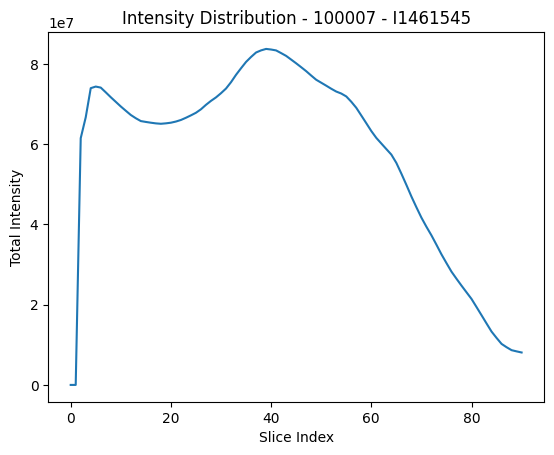

[17/3834] patient 100007 - image I1548449


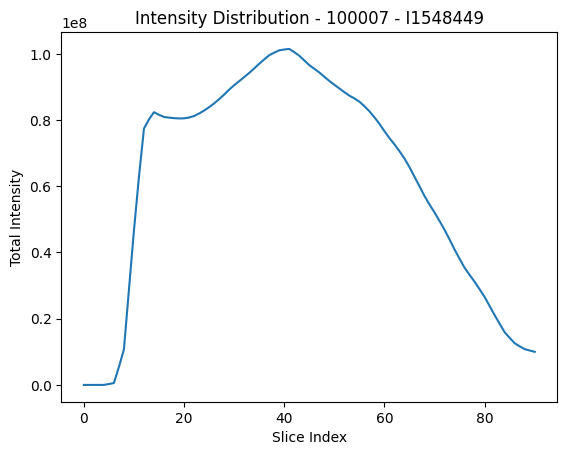

[18/3834] patient 100012 - image I1461546


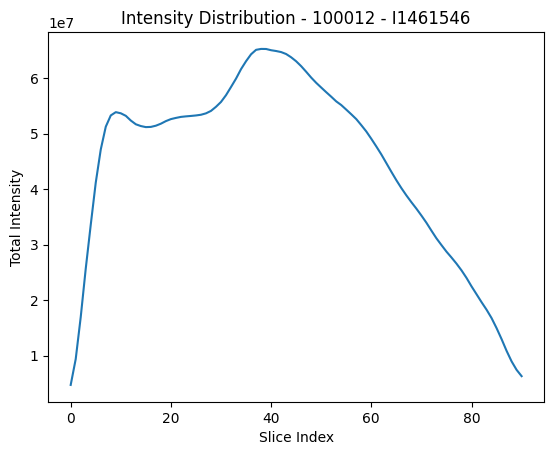

[19/3834] patient 100012 - image I1573146


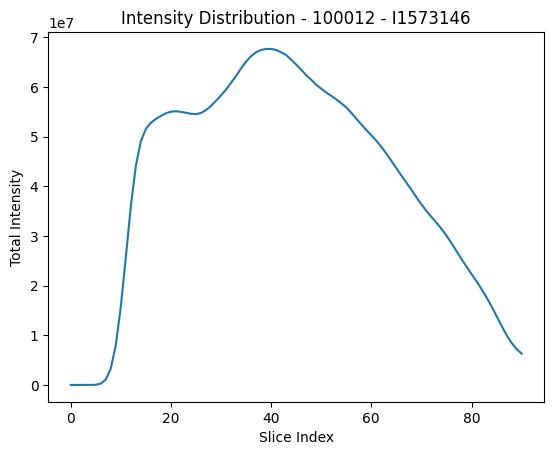

[20/3834] patient 100012 - image I1671552


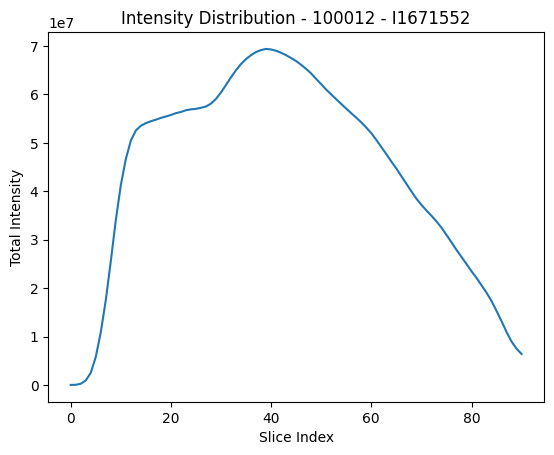

[21/3834] patient 100017 - image I1474775


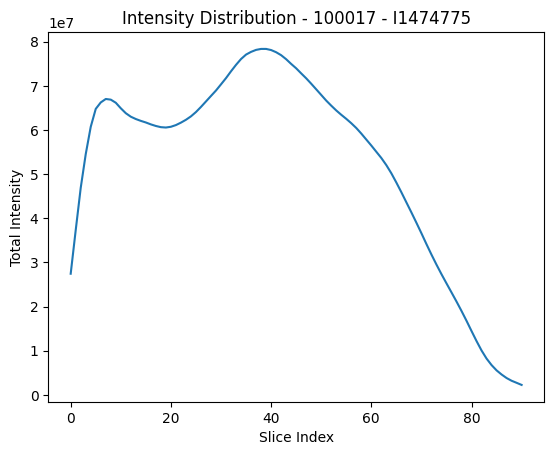

[22/3834] patient 100017 - image I1619847


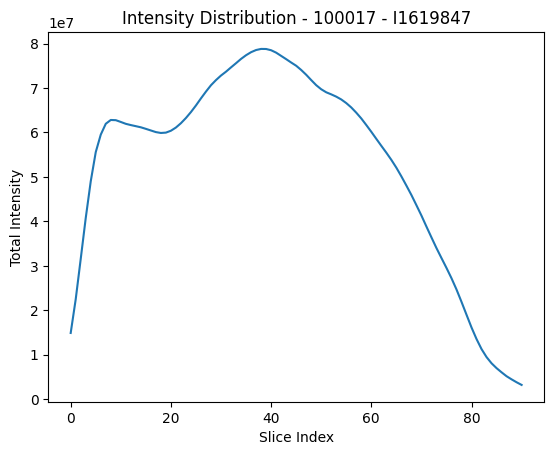

[23/3834] patient 100017 - image I1671556


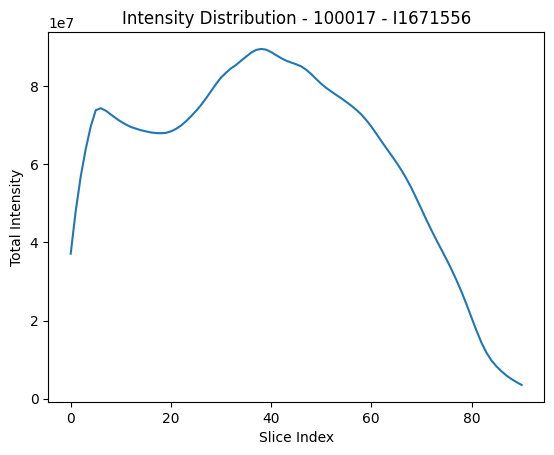

[24/3834] patient 100018 - image I10380468


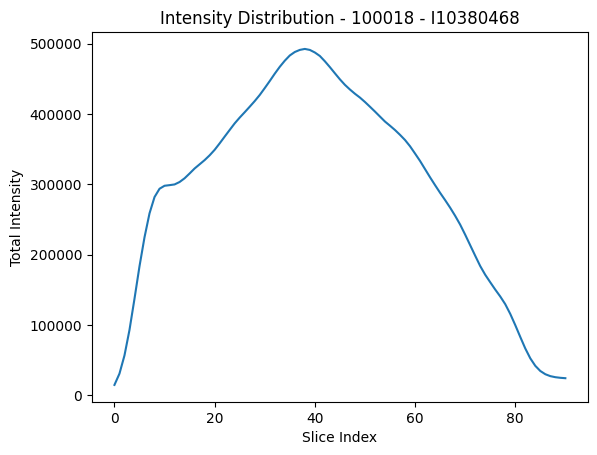

[25/3834] patient 100018 - image I1461547


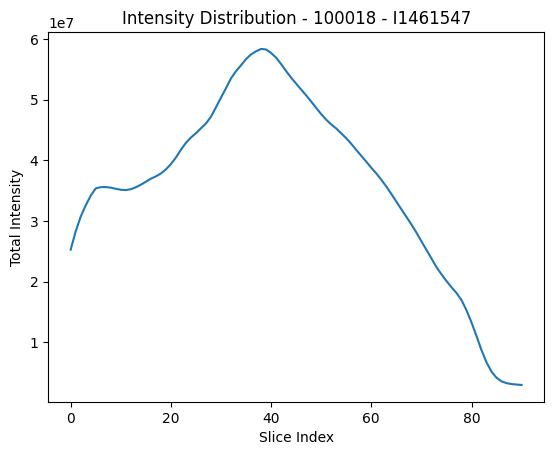

[26/3834] patient 100018 - image I1603132


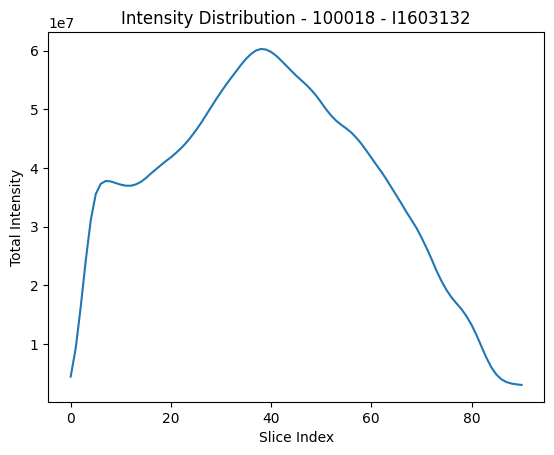

[27/3834] patient 100267 - image I10380475


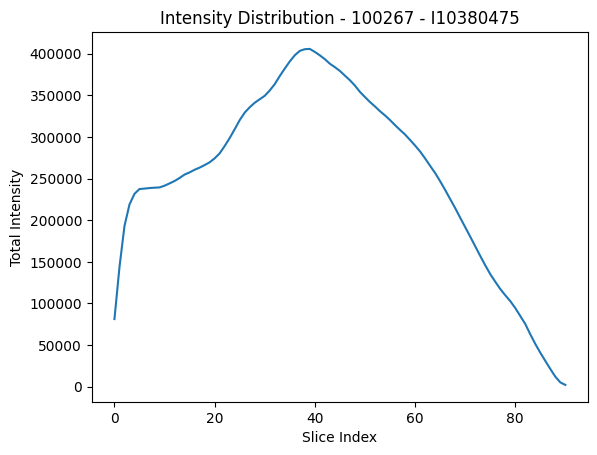

[28/3834] patient 100267 - image I1461548


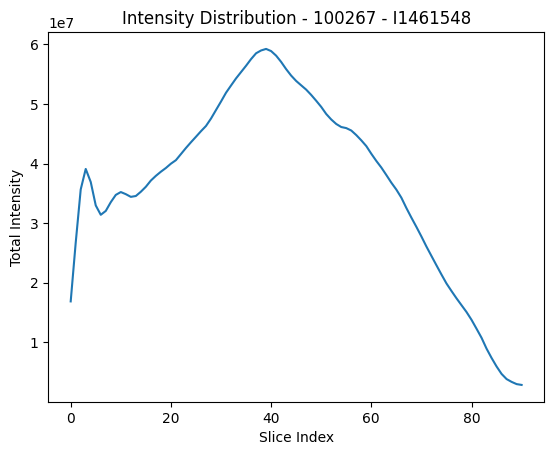

[29/3834] patient 100267 - image I1603133


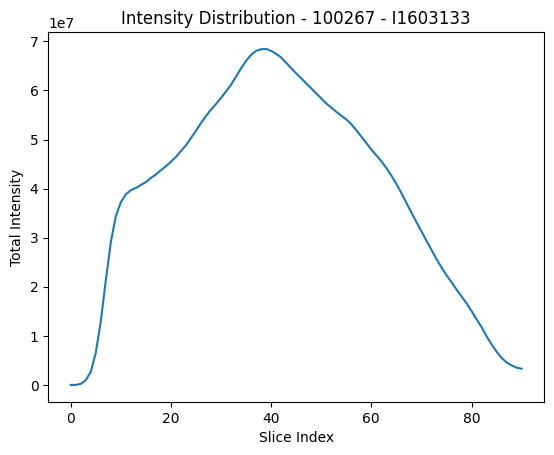

[30/3834] patient 100268 - image I10380476


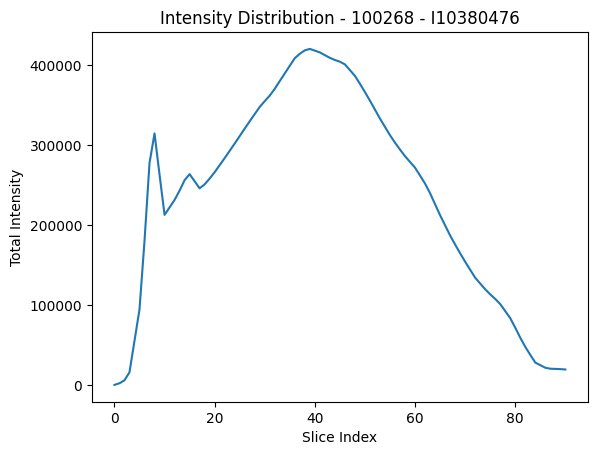

[31/3834] patient 100268 - image I1461549


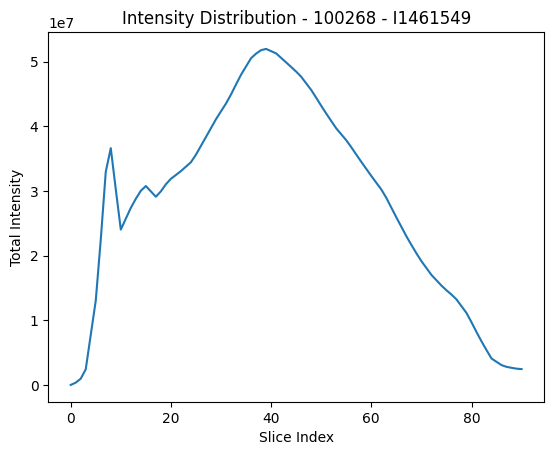

[32/3834] patient 100268 - image I1616053


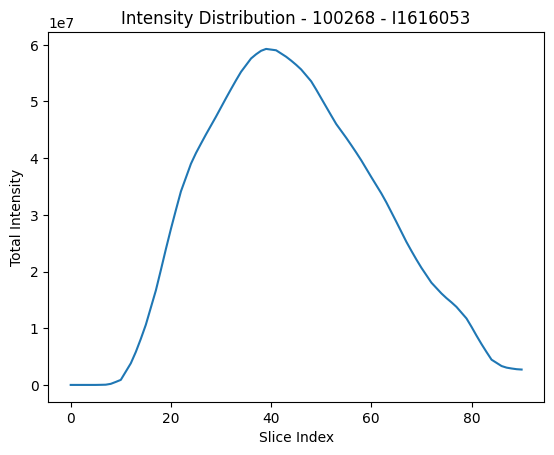

[33/3834] patient 100639 - image I1474776


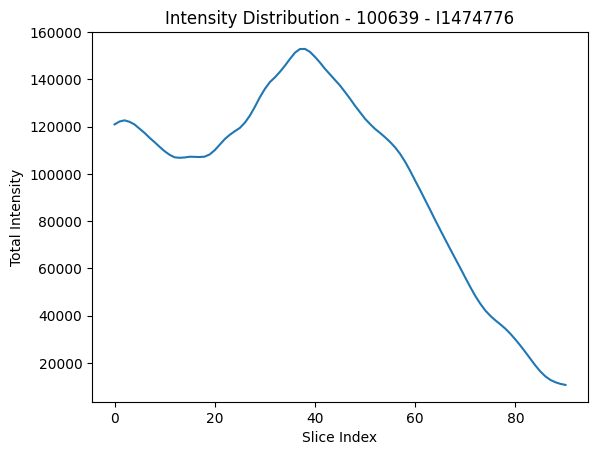

[34/3834] patient 100738 - image I1461550


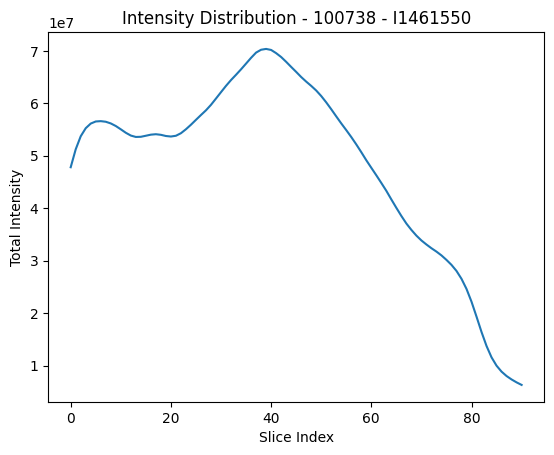

[35/3834] patient 100842 - image I10380486


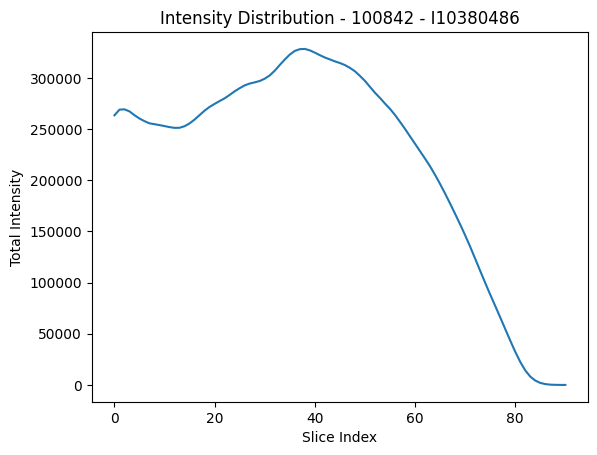

[36/3834] patient 100842 - image I1461551


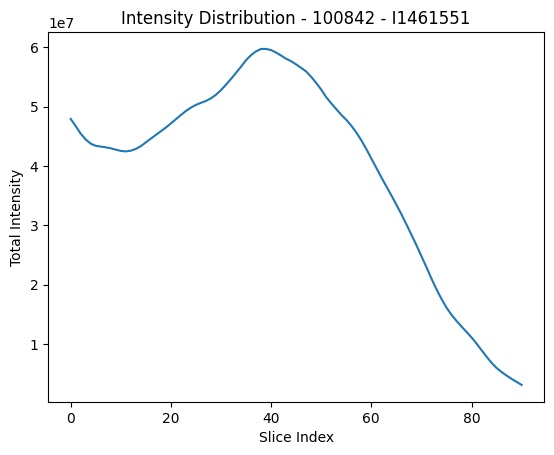

[37/3834] patient 100842 - image I1573147


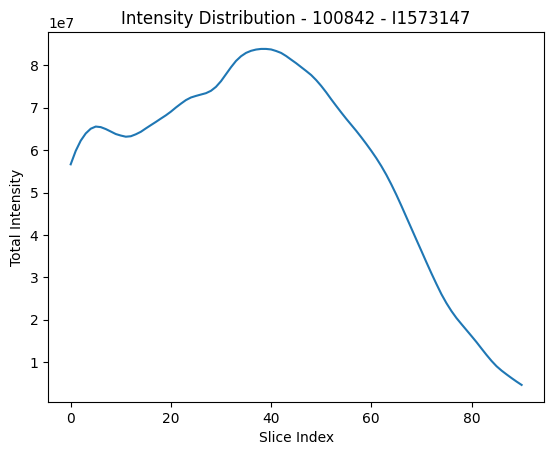

[38/3834] patient 100878 - image I10380489


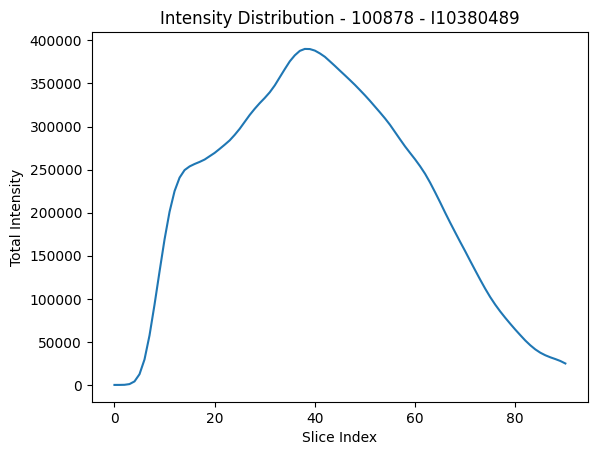

[39/3834] patient 100878 - image I1461552


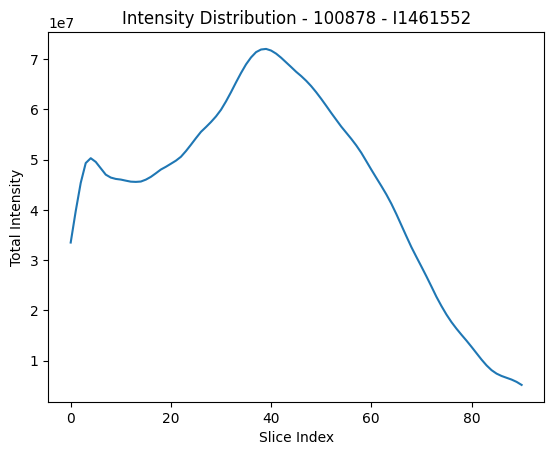

[40/3834] patient 100878 - image I1573148


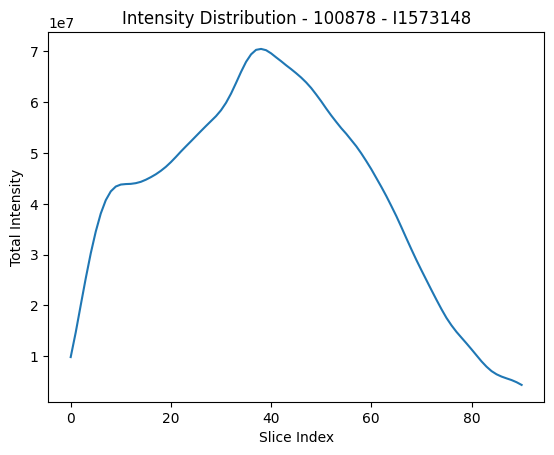

[41/3834] patient 100889 - image I10380490


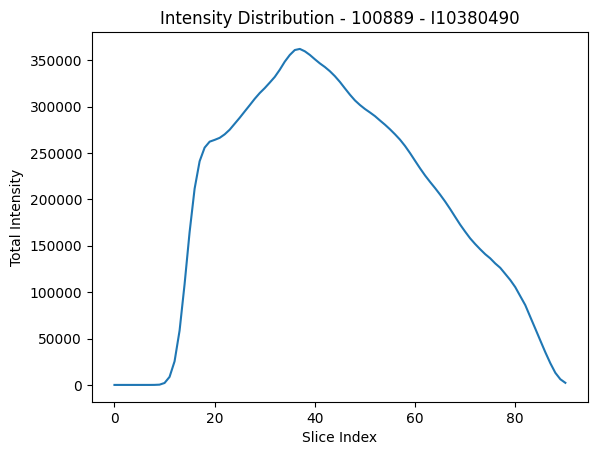

[42/3834] patient 100889 - image I1461553


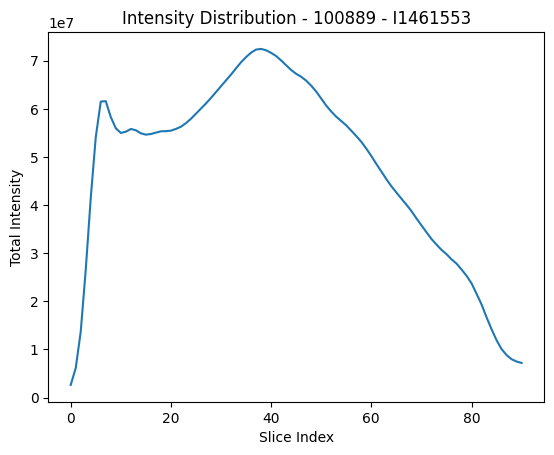

[43/3834] patient 100889 - image I1582688


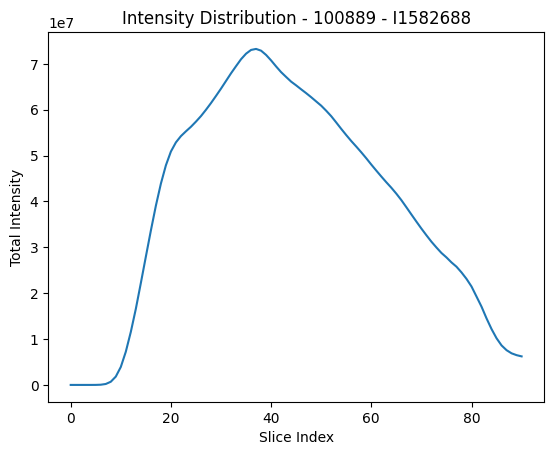

[44/3834] patient 100890 - image I1461554


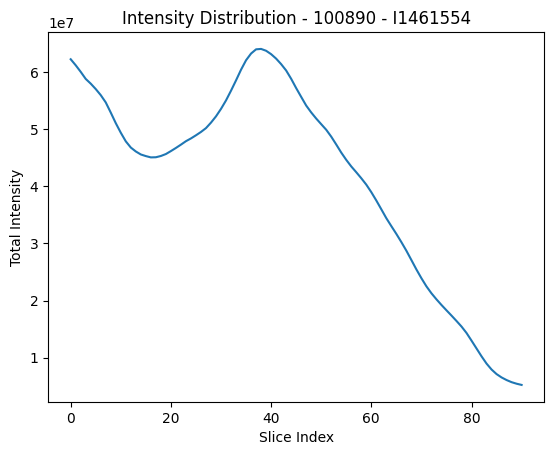

[45/3834] patient 100891 - image I1474777


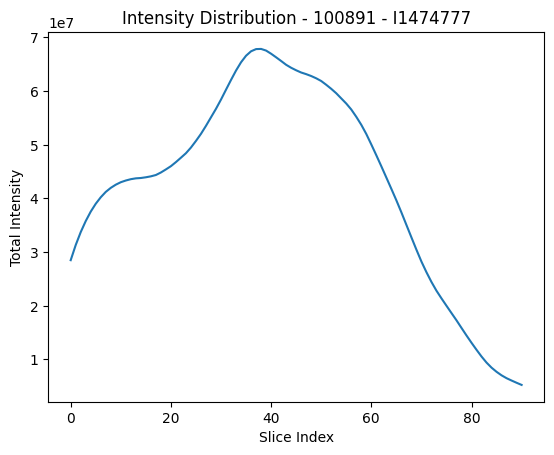

[46/3834] patient 100891 - image I1548450


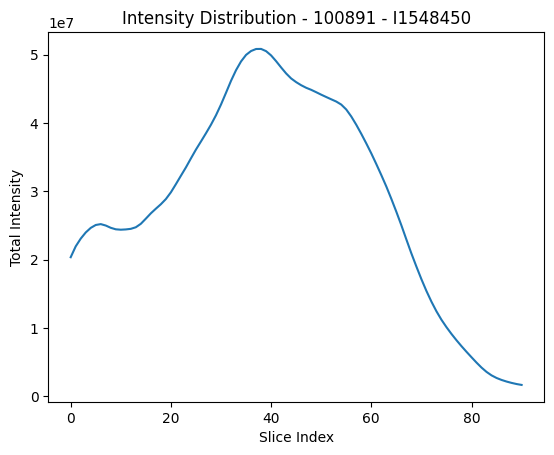

[47/3834] patient 100891 - image I1719494


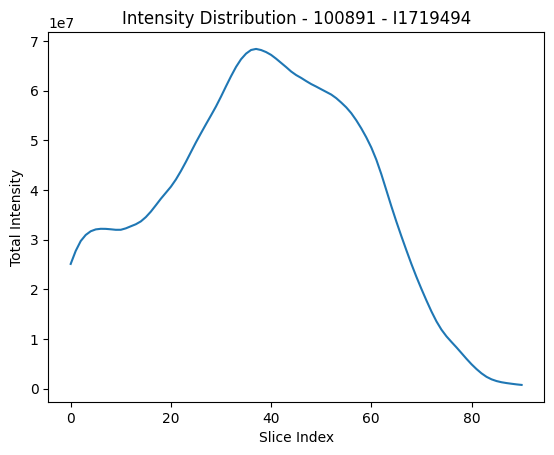

[48/3834] patient 100898 - image I1461555


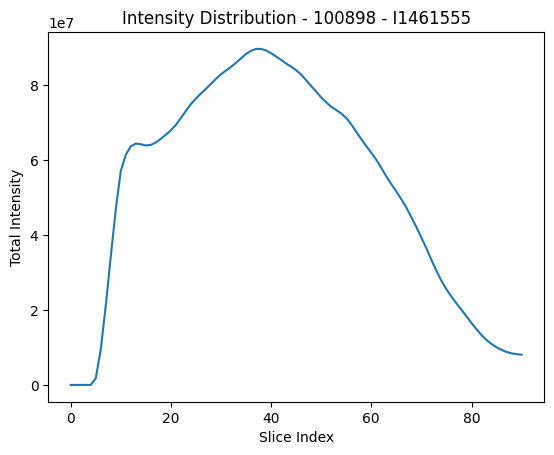

[49/3834] patient 100898 - image I1518599


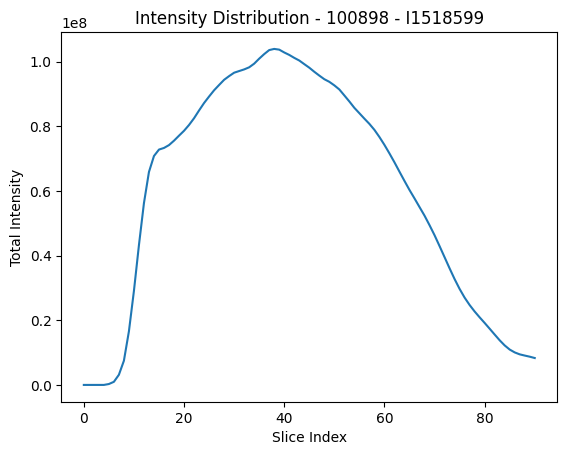

[50/3834] patient 100898 - image I1573149


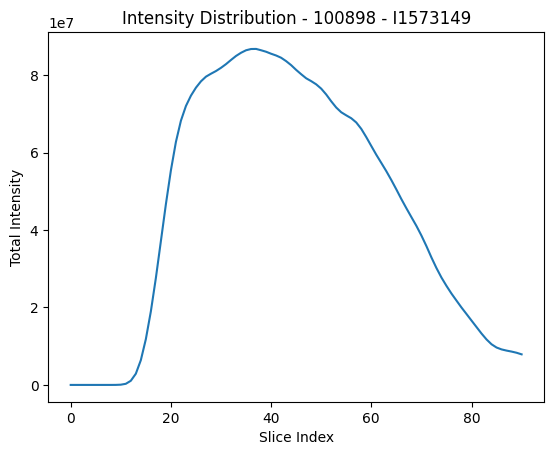

[51/3834] patient 100898 - image I1632232


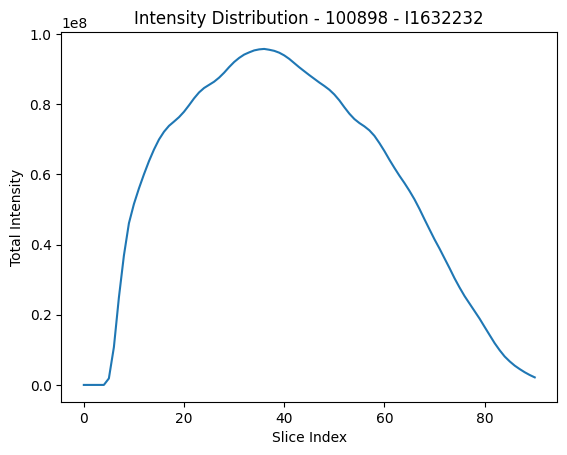

[52/3834] patient 100898 - image I1707528


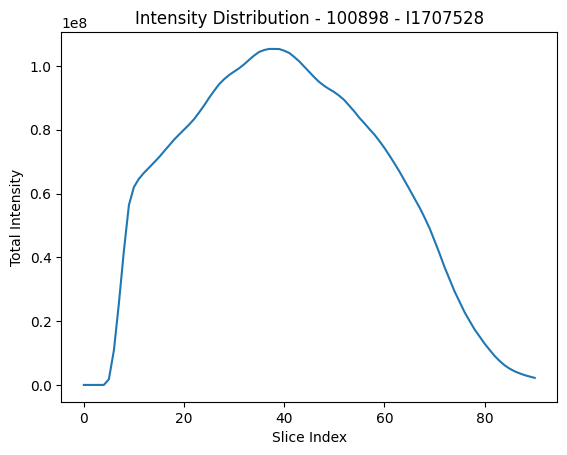

[53/3834] patient 100905 - image I10380491


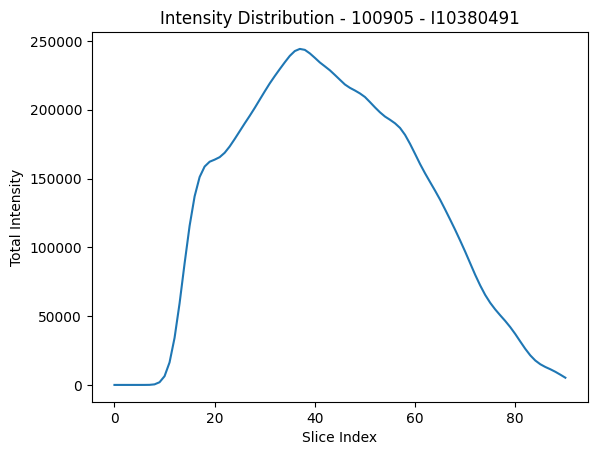

[54/3834] patient 100905 - image I10395065


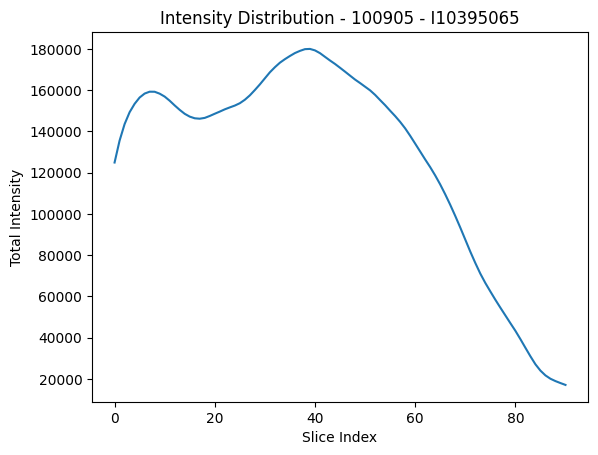

[55/3834] patient 100905 - image I1461556


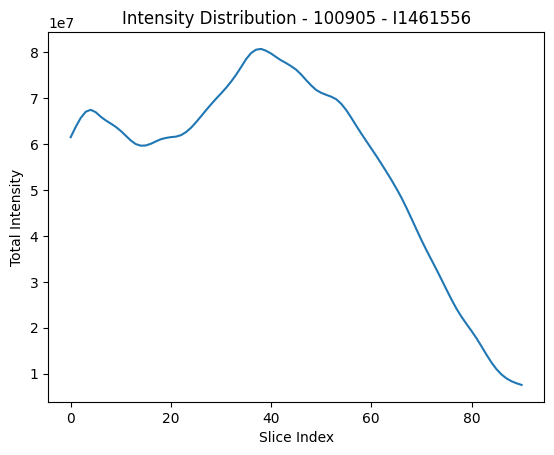

[56/3834] patient 100911 - image I10380492


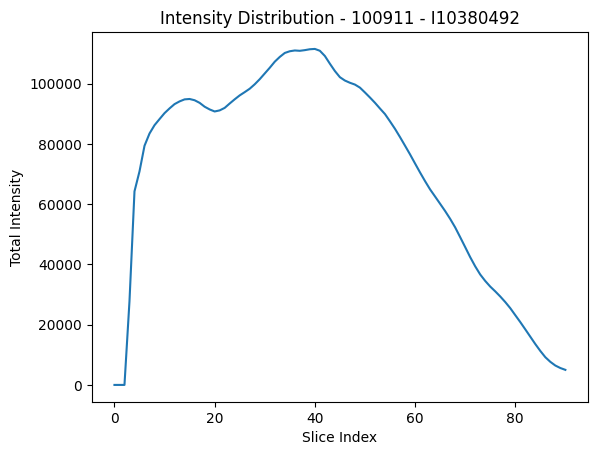

[57/3834] patient 100911 - image I10445473


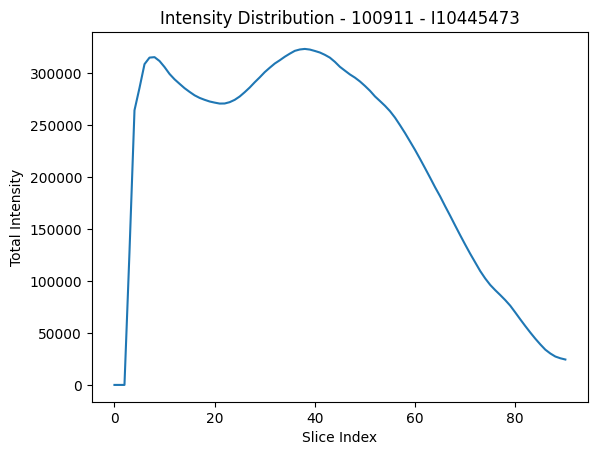

[58/3834] patient 100911 - image I1474778


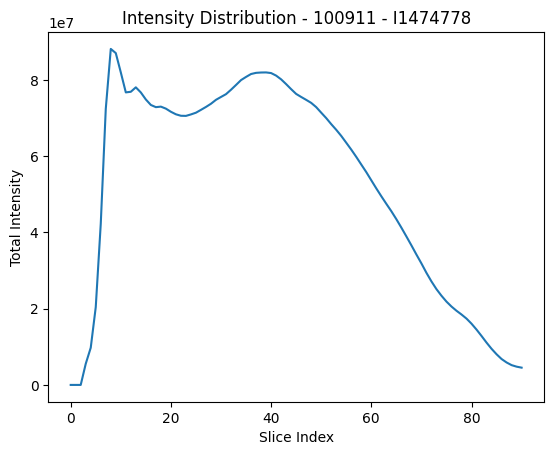

[59/3834] patient 100911 - image I1619848


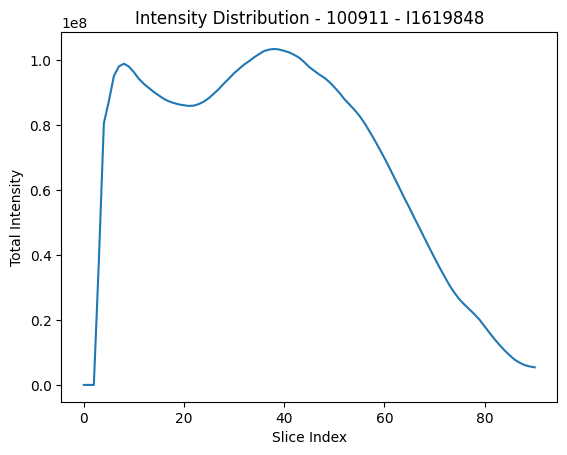

[60/3834] patient 100952 - image I10380493


KeyboardInterrupt: 

In [9]:
total_images = sum(
    1 for root, dirs, files in os.walk(nifti_path)
    for file in files if file.endswith(".nii") or file.endswith(".nii.gz")
)

processed_count = 0

for root, dirs, files in os.walk(nifti_path):
    for file in files:
        if not (file.endswith(".nii") or file.endswith(".nii.gz")):
            continue

        processed_count += 1
        
        patient_id = os.path.basename(root)
        img_id = os.path.splitext(os.path.splitext(file)[0])[0]
        
        print(f"[{processed_count}/{total_images}] patient {patient_id} - image {img_id}")
        
        input_path = os.path.join(root, file)

        # Load image
        img = nib.load(input_path)
        data = img.get_fdata()

        slice_intensities = [data[:, :, z].sum() for z in range(data.shape[2])]
        plt.plot(slice_intensities)
        plt.xlabel('Slice Index')
        plt.ylabel('Total Intensity')
        plt.title(f'Intensity Distribution - {patient_id} - {img_id}')
        plt.show()

## Merge all PPMI_ (DaTscan) folders

### check for duplicates patients

In [ ]:
from collections import defaultdict

# Path where PPMI_1 to PPMI_5 folders live
base_path = "Dataset/datscan_images"

# Store patients by which PPMI folder they appear in
patient_folders = defaultdict(list)

# Loop over each PPMI folder
for folder_name in sorted(os.listdir(base_path)):
    folder_path = os.path.join(base_path, folder_name)

    if os.path.isdir(folder_path) and folder_name.startswith("PPMI_"):
        # Each patient is usually a subfolder (adjust if stored differently)
        for patient_id in os.listdir(folder_path):
            patient_folders[patient_id].append(folder_name)

# Find duplicates
duplicates = {pid: locations for pid, locations in patient_folders.items() if len(locations) > 1}

# Report results
if duplicates:
    print("⚠ Found patients in multiple PPMI folders:")
    for pid, locations in duplicates.items():
        print(f" - Patient {pid} found in: {', '.join(locations)}")
else:
    print("✅ No duplicate patients found across PPMI_1 to PPMI_5")


⚠ Found patients in multiple PPMI folders:
 - Patient 100001 found in: PPMI_1, PPMI_2, PPMI_3, PPMI_5
 - Patient 100005 found in: PPMI_1, PPMI_3
 - Patient 100006 found in: PPMI_1, PPMI_2, PPMI_5
 - Patient 100012 found in: PPMI_1, PPMI_3
 - Patient 100017 found in: PPMI_1, PPMI_3
 - Patient 100018 found in: PPMI_1, PPMI_4
 - Patient 100268 found in: PPMI_1, PPMI_3, PPMI_4
 - Patient 100889 found in: PPMI_1, PPMI_3, PPMI_4
 - Patient 100891 found in: PPMI_1, PPMI_2
 - Patient 100898 found in: PPMI_1, PPMI_2, PPMI_3
 - Patient 100911 found in: PPMI_1, PPMI_3, PPMI_4
 - Patient 100952 found in: PPMI_1, PPMI_2, PPMI_5
 - Patient 101018 found in: PPMI_1, PPMI_5
 - Patient 101026 found in: PPMI_1, PPMI_3, PPMI_4
 - Patient 101038 found in: PPMI_1, PPMI_2, PPMI_5
 - Patient 101047 found in: PPMI_1, PPMI_2, PPMI_3, PPMI_4
 - Patient 101070 found in: PPMI_1, PPMI_5
 - Patient 101174 found in: PPMI_1, PPMI_3, PPMI_5
 - Patient 101179 found in: PPMI_1, PPMI_3, PPMI_5
 - Patient 101186 found in: 

### check for duplicates images per patient

In [18]:
# Step 1: Map patients to which PPMI folders they appear in
patient_folders = defaultdict(list)

for folder_name in sorted(os.listdir(base_path)):
    folder_path = os.path.join(base_path, folder_name)

    if os.path.isdir(folder_path) and folder_name.startswith("PPMI_"):
        for patient_id in os.listdir(folder_path):
            patient_path = os.path.join(folder_path, patient_id)
            if os.path.isdir(patient_path):
                patient_folders[patient_id].append(patient_path)

# Step 2: Check duplicates by image_id (last folder name)
duplicates = {pid: paths for pid, paths in patient_folders.items() if len(paths) > 1}

if not duplicates:
    print("✅ No duplicate patients found.")
else:
    print(f"⚠ Found {len(duplicates)} duplicate patients.\n")

    for patient_id, paths in duplicates.items():
        image_id_sets = []

        for path in paths:
            image_ids = set()
            for root, dirs, files in os.walk(path):
                # If this folder has no subfolders and contains files, it's an image_id folder
                if files and not dirs:
                    image_id = os.path.basename(root)
                    image_ids.add(image_id)
            image_id_sets.append(image_ids)

        # Compare all sets of image_ids
        identical = all(image_id_sets[0] == ids for ids in image_id_sets[1:])

        print(f"Patient {patient_id}: {'YES - identical image IDs' if identical else 'NO - different image IDs'}")


⚠ Found 857 duplicate patients.

Patient 100001: NO - different image IDs
Patient 100005: NO - different image IDs
Patient 100006: NO - different image IDs
Patient 100012: NO - different image IDs
Patient 100017: NO - different image IDs
Patient 100018: NO - different image IDs
Patient 100268: NO - different image IDs
Patient 100889: NO - different image IDs
Patient 100891: NO - different image IDs
Patient 100898: NO - different image IDs
Patient 100911: NO - different image IDs
Patient 100952: NO - different image IDs
Patient 101018: NO - different image IDs
Patient 101026: NO - different image IDs
Patient 101038: NO - different image IDs
Patient 101047: NO - different image IDs
Patient 101070: NO - different image IDs
Patient 101174: NO - different image IDs
Patient 101179: NO - different image IDs
Patient 101186: NO - different image IDs
Patient 101221: NO - different image IDs
Patient 101279: NO - different image IDs
Patient 101295: NO - different image IDs
Patient 101330: NO - dif

### merge all 5 folders

In [ ]:
import shutil


# Destination: merged single PPMI folder
output_dir = os.path.join(base_path, "PPMI")
os.makedirs(output_dir, exist_ok=True)

# Map: patient_id -> set of image_ids (to avoid duplicates)
patient_image_ids = defaultdict(set)

# Walk through all PPMI folders
for folder_name in sorted(os.listdir(base_path)):
    folder_path = os.path.join(base_path, folder_name)

    if os.path.isdir(folder_path) and folder_name.startswith("PPMI_"):
        for patient_id in os.listdir(folder_path):
            patient_path = os.path.join(folder_path, patient_id)
            if not os.path.isdir(patient_path):
                continue

            # Destination patient folder
            merged_patient_path = os.path.join(output_dir, patient_id)
            os.makedirs(merged_patient_path, exist_ok=True)

            # Walk through the substructure of each patient
            for scan_type in os.listdir(patient_path):
                scan_type_path = os.path.join(patient_path, scan_type)
                if not os.path.isdir(scan_type_path):
                    continue

                for date_folder in os.listdir(scan_type_path):
                    date_path = os.path.join(scan_type_path, date_folder)
                    if not os.path.isdir(date_path):
                        continue

                    for image_id in os.listdir(date_path):
                        image_id_path = os.path.join(date_path, image_id)
                        if not os.path.isdir(image_id_path):
                            continue

                        # Skip duplicate image_ids for the same patient
                        if image_id in patient_image_ids[patient_id]:
                            continue

                        # Mark image_id as seen
                        patient_image_ids[patient_id].add(image_id)

                        # Destination path preserving structure
                        merged_image_path = os.path.join(
                            merged_patient_path, scan_type, date_folder, image_id
                        )
                        os.makedirs(os.path.dirname(merged_image_path), exist_ok=True)

                        # Copy the entire image_id folder
                        shutil.copytree(image_id_path, merged_image_path)

print("✅ Merge complete! Output stored in:", output_dir)

✅ Merge complete! Output stored in: Dataset\PPMI_MERGED


### verify total number of patients and images

#### in the 5 folders

In [ ]:
ppmi_folders = [
    "Dataset/datscan_images/PPMI_1",
    "Dataset/datscan_images/PPMI_2",
    "Dataset/datscan_images/PPMI_3",
    "Dataset/datscan_images/PPMI_4",
    "Dataset/datscan_images/PPMI_5"
]

all_patients = set()
total_unique_images = 0

for folder in ppmi_folders:
    for patient_id in os.listdir(folder):
        patient_path = os.path.join(folder, patient_id)
        if not os.path.isdir(patient_path):
            continue

        all_patients.add(patient_id)

        # Track unique image IDs for this patient inside this folder
        patient_image_ids = set()

        for scan_type in os.listdir(patient_path):
            scan_type_path = os.path.join(patient_path, scan_type)
            if not os.path.isdir(scan_type_path):
                continue

            for date_folder in os.listdir(scan_type_path):
                date_path = os.path.join(scan_type_path, date_folder)
                if not os.path.isdir(date_path):
                    continue

                for image_id in os.listdir(date_path):
                    if os.path.isdir(os.path.join(date_path, image_id)):
                        patient_image_ids.add(image_id)

        total_unique_images += len(patient_image_ids)

print(f"📌 Total unique patients: {len(all_patients)}")
print(f"📌 Total unique image IDs: {total_unique_images}")

📌 Total unique patients: 2033
📌 Total unique image IDs: 3839


#### in the merged folder

In [ ]:
merged_path = "Dataset/datscan_images/PPMI"

all_patients = set()
total_unique_images = 0

for patient_id in os.listdir(merged_path):
    patient_path = os.path.join(merged_path, patient_id)
    if not os.path.isdir(patient_path):
        continue

    all_patients.add(patient_id)

    # Track unique image IDs for this patient
    patient_image_ids = set()

    for scan_type in os.listdir(patient_path):
        scan_type_path = os.path.join(patient_path, scan_type)
        if not os.path.isdir(scan_type_path):
            continue

        for date_folder in os.listdir(scan_type_path):
            date_path = os.path.join(scan_type_path, date_folder)
            if not os.path.isdir(date_path):
                continue

            for image_id in os.listdir(date_path):
                if os.path.isdir(os.path.join(date_path, image_id)):
                    patient_image_ids.add(image_id)

    # Add this patient's unique image count to the total
    total_unique_images += len(patient_image_ids)

print(f"📌 Total unique patients: {len(all_patients)}")
print(f"📌 Total unique image IDs: {total_unique_images}")

📌 Total unique patients: 2033
📌 Total unique image IDs: 3836
